# Aygaz Görüntü İşleme Bootcamp 📷

### 🐾 Proje Amacı ve Kapsamı

**Proje Özeti 🧠**

Bu proje, Konvolüsyonel Sinir Ağları (Convolutional Neural Networks - CNN) kullanılarak, 10 farklı hayvan türünün sınıflandırılmasını hedeflemektedir. Proje sürecinde gerçekleştirilen adımlar titizlikle planlanmış ve her bir aşama, sınıflandırma başarısını artırmak amacıyla özenle uygulanmıştır. Aşağıda proje kapsamında gerçekleştirilen adımlar detaylı şekilde açıklanmaktadır:

**📁 Veri Hazırlama ve Görselleştirme**

Veri seti görselleştirilmiş ve her bir sınıfta bulunan örnek sayıları detaylı şekilde analiz edilmiştir. Bu adım, sınıflar arasındaki olası dengesizliklerin (data imbalance) tespit edilmesi açısından kritik bir rol oynamıştır.
Tüm görüntüler yeniden boyutlandırılmış (boyutlar: 128x128x3) ve veri seti pickle formatında saklanmıştır.

**📊 Veri Ayrımı ve Çoğaltma**

Veri seti, eğitim (train), doğrulama (validation) ve test (test) olmak üzere üç farklı alt gruba ayrılmıştır.
Data augmentation (veri çoğaltma) teknikleri uygulanarak, veri setinin çeşitliliği artırılmıştır. Bu işlemler arasında yatay-dikey çevirme, yakınlaştırma, döndürme ve parlaklık değişimi gibi yöntemler kullanılmıştır.

**🧪 Model Tasarımı ve Eğitim**

Konvolüsyonel Sinir Ağı (CNN) modeli tasarlanmış ve optimize edilmiştir. Model, veri seti üzerinde eğitilerek sınıflandırma performansı analiz edilmiştir.
Model eğitimi sonrasında sonuçlar değerlendirilmiş, sınıflandırma başarı oranları ve hataları confusion matrisi ile görselleştirilmiştir.

**⚙️ Hiperparametre Optimizasyonu**

Modelin performansını artırmak amacıyla hiperparametre optimizasyonu gerçekleştirilmiştir. Bu süreçte katman sayısı (number of layers), model derinliği ve aktivasyon fonksiyonları (activation functions) gibi parametreler üzerinde detaylı çalışmalar yapılmıştır.

Ayrıca, modelin genelleştirme yeteneğini artırmak ve farklı veri alt kümelerinde daha tutarlı sonuçlar elde edebilmek için K-Fold Cross Validation yöntemi uygulanmıştır. Bu yöntemle, veri seti K eşit parçaya bölünerek model her bir parçada test edilip, diğer parçalar üzerinde eğitilmiştir. Bu sayede modelin doğruluk ve hata oranları daha güvenilir bir şekilde değerlendirilmiştir.

**💡 Test Seti Manipülasyonu ve Performans Analizi**

Test veri seti, farklı ışıklandırma koşullarıyla manipüle edilmiştir. Bu manipülasyonlar, modelin gerçek hayattaki değişken koşullara karşı dayanıklılığını ölçmek amacıyla yapılmıştır.
Manipüle edilmiş veri seti ile yeniden doğruluk testi gerçekleştirilmiş ve modelin ışık değişkenliğine olan duyarlılığı analiz edilmiştir.

**🎨 Renk Sabitliği (Color Constancy)**

Renk sabitliği algoritmaları uygulanarak görüntülerin renk dağılımları dengelenmiştir. Bu işlemin ardından model, yeniden test edilerek performans değişimi incelenmiştir.

**🌟 Tartışma ve Sonuç**

Model eğitim sürecinde yapılanlar değerlendirilmiş, geliştirilebilir noktalar tartışılmıştır.

### 1-📁 Veri Hazırlama ve Görselleştirme

#### 1.1- Gerekli kütüphanelerin eklenmesi

In [48]:
# Essential libraries
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
from IPython.display import clear_output

# Image processing libraries
import cv2
from PIL import Image

# Machine Learning and Deep Learning
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Flatten, Dropout,Conv2D, MaxPooling2D, LeakyReLU
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback

# Model tuning
import keras_tuner as kt

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold

# Visualization
import seaborn as sn

# Optional: Serialization
import pickle

**Temel Kütüphaneler**

1. **`os`**
   - Dosya ve dizin işlemleri için kullanılır.
   - Örnek: Resim dosyalarını yükleme veya modelleri kaydetme.

2. **`sys`**
   - Sistemle ilgili parametreler ve fonksiyonlar sağlar.
   - Örnek: Python çalışma zamanı ortamını yönetme veya komut satırı argümanlarını işleme.

3. **`numpy`**
   - Sayısal hesaplamalar ve matris işlemleri için temel bir kütüphane.
   - Örnek: Veri ön işleme, görüntü manipülasyonu ve matris hesaplamaları.

4. **`matplotlib.pyplot`**
   - Grafik ve veri görselleştirme için kullanılır.
   - Örnek: Eğitim metriklerini ve kayıp eğrilerini görselleştirme, örnek görüntüleri gösterme.

5. **`pathlib`**
   - Dosya sistemi yollarını nesne tabanlı bir şekilde yönetmek için kullanılır.
   - Örnek: Veri ön işleme sırasında dosya yollarını yönetme.

---

**Görüntü İşleme Kütüphaneleri**

6. **`cv2` (OpenCV)**
   - Görüntüleri okuma, dönüştürme ve işleme kütüphanesi.
   - Örnek: Giriş görüntülerini ön işleme, yeniden boyutlandırma, filtre uygulama.

7. **`PIL` (Python Imaging Library)**
   - Görüntü formatlarını işleme ve temel düzenleme işlemleri için kullanılır.
   - Örnek: Görüntüleri okuma, dönüştürme veya kaydetme.

---

**Makine Öğrenimi ve Derin Öğrenme**

8. **`tensorflow`**
   - Derin öğrenme modelleri oluşturmak ve eğitmek için temel framework.
   - Örnek: Model tanımlama, eğitme ve tahmin yapma.

9. **`tensorflow.keras` (alt modüller)**
   - **`preprocessing.image.ImageDataGenerator`**:
     - Veri artırma ve eğitim sırasında gerçek zamanlı görüntü ön işleme.
   - **`utils.to_categorical`**:
     - Sınıf vektörlerini (tam sayılar) tek seferlik (one-hot encoded) etiketlere dönüştürür.
   - **`models.Sequential`**:
     - Katmanların doğrusal bir yığınını tanımlamak için kullanılır.
   - **`layers`** (örneğin: `Dense`, `Conv2D`, `MaxPooling2D`, `Dropout`, `LeakyReLU`):
     - Derin öğrenme modelinin mimarisini tanımlayan yapı taşları.
   - **`optimizers.Adam`**:
     - Sinir ağını eğitmek için kullanılan optimizasyon algoritması.
   - **`callbacks`** (örneğin: `EarlyStopping`, `ReduceLROnPlateau`, `Callback`):
     - Model eğitimi akışını kontrol etmek için kullanılır (örneğin, aşırı öğrenme durumunda erken durdurma).

---

**Model Optimizasyonu**

10. **`keras_tuner`**
    - Hiperparametre optimizasyonu için bir kütüphane.
    - Örnek: Öğrenme oranını, katman sayısını veya bir modeldeki birim sayısını optimize etme.

---

**Scikit-learn**

11. **`sklearn.model_selection.train_test_split`**
    - Veriyi eğitim ve test setlerine böler.
    - Örnek: Görüntü veri kümelerini model eğitimi ve değerlendirme için ayırma.

12. **`sklearn.metrics` (örneğin: `confusion_matrix`, `ConfusionMatrixDisplay`)**
    - Model performansını değerlendirmek için metrikler sağlar.
    - Örnek: Karmaşıklık matrislerini oluşturma ve görselleştirme.

---

**Veri Görselleştirme**

13. **`seaborn` (kısaltması: `sn`)**
    - Gelişmiş veri görselleştirme kütüphanesi.
    - Örnek: Karmaşıklık matrisi için ısı haritası oluşturma veya veri dağılımlarını görselleştirme.

---

**Özel Yardımcı Fonksiyonlar**

14. **`utilities`**
    - **`get_manipulated_images` ve `get_wb_images`**:
      - Kullanıcı tarafından tanımlanan görüntü yükleme veya işleme fonksiyonlarıdır.

---

**Serileştirme**

15. **`pickle`**
    - Python nesnelerini serileştirme ve seriden çıkarma işlemleri için kullanılır.
    - Örnek: Ön işlenmiş verileri, modelleri veya sonuçları kaydetme ve yükleme.

---

In [6]:
base_dir="../data/raw"
data_dir=pathlib.Path(base_dir)
data_dir

WindowsPath('../data/raw')

**`pathlib.Path()`** fonksiyonu ile veri setinin ham halde bulunduğu dizin ana dizin olarak alınır.

In [7]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('../data/raw/collie/collie_10001.jpg'),
 WindowsPath('../data/raw/collie/collie_10002.jpg'),
 WindowsPath('../data/raw/collie/collie_10003.jpg'),
 WindowsPath('../data/raw/collie/collie_10004.jpg'),
 WindowsPath('../data/raw/collie/collie_10005.jpg'),
 WindowsPath('../data/raw/collie/collie_10006.jpg'),
 WindowsPath('../data/raw/collie/collie_10007.jpg'),
 WindowsPath('../data/raw/collie/collie_10008.jpg'),
 WindowsPath('../data/raw/collie/collie_10009.jpg'),
 WindowsPath('../data/raw/collie/collie_10010.jpg'),
 WindowsPath('../data/raw/collie/collie_10011.jpg'),
 WindowsPath('../data/raw/collie/collie_10012.jpg'),
 WindowsPath('../data/raw/collie/collie_10013.jpg'),
 WindowsPath('../data/raw/collie/collie_10014.jpg'),
 WindowsPath('../data/raw/collie/collie_10015.jpg'),
 WindowsPath('../data/raw/collie/collie_10016.jpg'),
 WindowsPath('../data/raw/collie/collie_10017.jpg'),
 WindowsPath('../data/raw/collie/collie_10018.jpg'),
 WindowsPath('../data/raw/collie/collie_10019.

**`list()`** fonksiyonu ile tüm *.jpg* formatlı dosyalar yukarıda listelenmiştir.

In [8]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

9830

Veri seti **9830** resim içermektedir.

In [9]:
dolphin=list(data_dir.glob('dolphin/*'))
dolphin[:5]  

[WindowsPath('../data/raw/dolphin/dolphin_10001.jpg'),
 WindowsPath('../data/raw/dolphin/dolphin_10002.jpg'),
 WindowsPath('../data/raw/dolphin/dolphin_10003.jpg'),
 WindowsPath('../data/raw/dolphin/dolphin_10004.jpg'),
 WindowsPath('../data/raw/dolphin/dolphin_10005.jpg')]

Pathlib kütüphanesi ile klasörleri filtrelemek oldukça kolaydır. Yukarıda **"dolphin"** sınıfına ait 5 resim uzantısı listelenmiştir.

#### 1.2-Verilerin Görselleştirilmesi

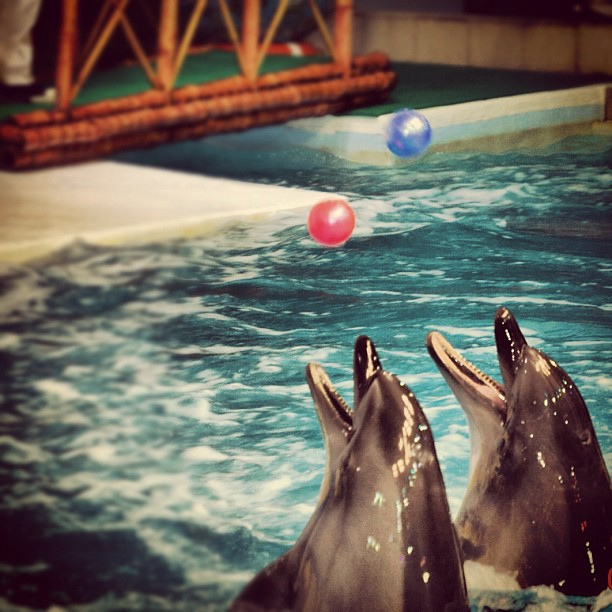

In [10]:
Image.open(str(dolphin[1]))

*`PIL`* fonksiyonlarından **Image.open()** ile veri setinden örnek bir resim yukarıda gösterilmektedir.

#### 1.3-Resim ve Sınıfların Ayrılması

In [11]:
classes_file = os.path.join(base_dir, "classes.txt")
classes=[]
labels=[]

with open(classes_file, 'r') as f:
    for line in f.readlines():
        labels.append(str(line.split(' ', 1)[0].strip()))
        classes.append(str(line.split(' ', 1)[1].strip()))

Bu kodda, `classes.txt` dosyası okunarak her satırdaki veriler ayrıştırılmakta ve iki ayrı listeye kaydedilmektedir. Satırların ilk kelimesi `labels` listesine, geri kalan kısmı ise `classes` listesine eklenmektedir. Böylece, dosyadaki bilgilerin etiketler ve sınıflar olarak ayrılması sağlanmaktadır.

In [12]:
labels

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

In [13]:
classes

['collie',
 'dolphin',
 'elephant',
 'fox',
 'giant+panda',
 'moose',
 'polar+bear',
 'rabbit',
 'sheep',
 'squirrel']

#### 1.4-Veri Dengesizliklerinin Engellenmesi 

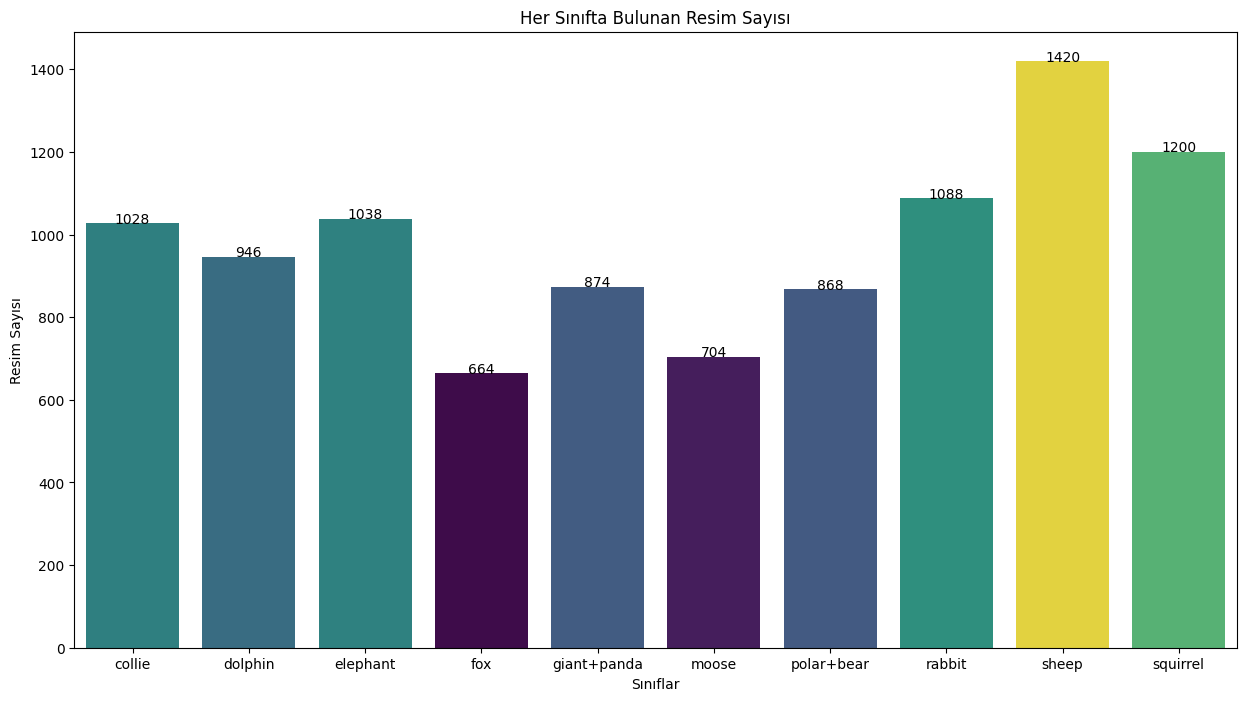

In [14]:
# Veri toplama
class_counts = {}
for class_name in classes:
    class_counts[class_name] = len(list(data_dir.glob(f"{class_name}/*")))

# Görselleştirme
plt.figure(figsize=(15,8))
ax=sn.barplot(x=list(class_counts.keys()), y=list(class_counts.values()),hue=list(class_counts.values()),palette="viridis",legend=False)
for i, v in enumerate(class_counts.values()):
   ax.text(i, v + 0.2, str(v), ha='center')
plt.xlabel("Sınıflar")
plt.ylabel("Resim Sayısı")
plt.title("Her Sınıfta Bulunan Resim Sayısı")
plt.show()

Bu kod, sınıflardaki görüntü sayılarının toplanmasını ve görselleştirilmesini sağlamaktadır.  

Öncelikle, `classes` listesindeki her bir sınıf için, `data_dir` dizininde ilgili sınıfa ait dosyalar sayılmakta ve bu bilgiler `class_counts` isimli bir sözlükte saklanmaktadır. Ardından, bu veri kullanılarak `matplotlib` ve `seaborn` kütüphaneleriyle bir çubuk grafik oluşturulmaktadır. Grafik üzerinde, her çubuğun üstüne ilgili sınıftaki görüntü sayısı eklenmektedir.

Grafikten yola çıkarak dengeli bir veri seti oluşturmak için her sınıftan **`650`** örnek alınacaktır.

In [15]:
animal_images_dict={}
image_count=650
for class_name in classes:
    animal_images_dict.update({f"{class_name}":list(data_dir.glob(f"{class_name}/*"))[:image_count]})

Bu kod, her sınıfa ait belirli sayıda görüntüyü bir sözlükte saklamak için kullanılmaktadır.

- `animal_images_dict` isimli bir boş sözlük tanımlanmıştır.  
- `classes` listesindeki her bir sınıf için, `data_dir` dizininde o sınıfa ait dosyalar aranmakta ve bu dosyalardan sadece ilk `image_count`  kadar olanları seçilmektedir.  
- Her sınıf adı anahtar olarak, bu sınıfa ait görüntülerin listesi ise değer olarak `animal_images_dict` sözlüğüne eklenmektedir.  

Bu işlemle, her sınıfa ait belirli sayıda görüntü, sınıflara göre organize edilmiş bir sözlük yapısında saklanmaktadır.

In [16]:
animal_images_dict["dolphin"][:5]

[WindowsPath('../data/raw/dolphin/dolphin_10001.jpg'),
 WindowsPath('../data/raw/dolphin/dolphin_10002.jpg'),
 WindowsPath('../data/raw/dolphin/dolphin_10003.jpg'),
 WindowsPath('../data/raw/dolphin/dolphin_10004.jpg'),
 WindowsPath('../data/raw/dolphin/dolphin_10005.jpg')]

In [17]:
len(animal_images_dict["dolphin"])

650

Her sınıfa ait uzantılar ve toplam resim sayısı yukarıda görülmektedir.

In [18]:
animals_labels_dict={}
for class_name,label in zip(classes,labels):
    animals_labels_dict.update({f"{class_name}":int(label)})

Bu kod, her sınıf adı ile ona karşılık gelen etiketin eşleştirilmesini ve bu eşleşmenin bir sözlükte saklanmasını sağlar.

- `animals_labels_dict` adlı boş bir sözlük tanımlanmıştır.  
- `zip(classes, labels)` kullanılarak, `classes` ve `labels` listelerindeki her bir sınıf adı ve etiket birleştirilir.  
- Her sınıf adı ve etiket çiftleri, `animals_labels_dict` sözlüğüne eklenir. Etiketler, tam sayı (integer) olarak saklanır.  

Sonuç olarak, her sınıf adı, karşılık gelen etiketle birlikte `animals_labels_dict` sözlüğünde saklanır.

In [19]:
animals_labels_dict

{'collie': 1,
 'dolphin': 2,
 'elephant': 3,
 'fox': 4,
 'giant+panda': 5,
 'moose': 6,
 'polar+bear': 7,
 'rabbit': 8,
 'sheep': 9,
 'squirrel': 10}

Elde edilen **animals_labels_dict** yukarıdaki gibidir.

### 2-📊 Veri Ayrımı ve Çoğaltma

**Veri Ayrımı ve Çoğaltma Aşaması: Detaylı Alt Görevler**

1. **Resimlerin Yeniden Boyutlandırılması ve Listede Saklanması**  
   Görseller, belirlenen boyutlarda yeniden boyutlandırılır ve bu boyutlandırılmış resimler, ilerleyen aşamalarda işlenebilmesi için bir listeye eklenir.
---
2. **Listelerin Numpy Dizilerine Dönüştürülmesi**  
   Resim ve etiket verileri, matematiksel işlemler ve model eğitimine uygun olacak şekilde Numpy dizilerine dönüştürülür.
---
3. **Resim ve Etiketlerin Pickle Formatında Serileştirilmesi ve Kaydedilmesi**  
   Resim verileri ve etiketler, daha sonraki işlemler için hızlı bir şekilde erişilebilmeleri amacıyla pickle formatında serileştirilir ve depolanır.
---
4. **Pickle Formatındaki Verilerin Yüklenmesi (Opsiyonel)**  
   Daha önce kaydedilmiş pickle formatındaki veri dosyaları yüklenir, böylece veri setine yeniden erişim sağlanır (bu adım isteğe bağlıdır).
---
5. **Eğitim ve Test Setine Ayırma (Train-Test Split)**  
   Veriler, modelin doğru şekilde eğitilmesi ve değerlendirilmesi için eğitim, doğrulama ve test setlerine ayrılır.
---
6. **One-Hot Encoding**  
   Kategorik etiketler, modelin anlayacağı şekilde sayısal verilere dönüştürülür. Bu işlem, her etiketin kendi temsilini taşıyan ikili vektörlere dönüştürülmesini içerir.
---
7. **Veri Çoğaltma (Data Augmentation)**  
   Eğitim verisinin çeşitlendirilmesi amacıyla, görseller üzerinde dönüşümler (örneğin, döndürme, kaydırma, yakınlaştırma) yapılır. Bu işlem, modelin genelleme yeteneğini artırmaya yardımcı olur.
---

#### 2.1-Resimlerin Yeniden Boyutlandırılması ve Listede Saklanması

In [20]:
width,height=128,128

X,y=[],[]

for animal_name, images in animal_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_image=cv2.resize(img,(width,height))
        X.append(resized_image)
        y.append(animals_labels_dict[animal_name])

Bu kod, `animal_images_dict` sözlüğündeki her bir hayvan sınıfına ait görüntüleri okur, her birini 128x128 boyutuna yeniden boyutlandırır ve bunları `X` ve `y` listelerine ekler. Görüntüler `X` listesine, her bir görüntüye ait etiketler ise `y` listesine eklenir. Bu sayede, boyutlandırılmış görüntüler ve bunlara karşılık gelen etiketler hazır hale getirilir.

#### 2.2-Listelerin Numpy Dizilerine Dönüştürülmesi

In [21]:
X=np.array(X)
y=np.array(y)

Bu kod, `X` ve `y` listelerini NumPy dizilerine dönüştürür. Böylece, görüntüler (`X`) ve etiketler (`y`) daha verimli bir şekilde işlenebilir ve model eğitimine uygun hale gelir. `X` görüntülerini, `y` ise bu görüntülere karşılık gelen etiketleri içeren NumPy dizileri olarak saklar.

In [22]:
X.shape

(6500, 128, 128, 3)

In [23]:
y.shape

(6500,)

10 Sınıfa ait 6500 resim (6500,128,128,3) formatında; 10 sınıfa ait 6500 etiket (6500,) formatındadır.  

#### 2.3-Resim ve Etiketlerin Pickle Formatında Serileştirilmesi ve Kaydedilmesi

In [24]:
with open('../data/processed/Images.pkl', 'wb') as f:
    pickle.dump(X, f)

with open('../data/processed/Labels.pkl', 'wb') as f:
    pickle.dump(y, f)

Bu kod, `X` ve `y` dizilerini sırasıyla `'../data/processed/Images.pkl'` ve `'../data/processed/Labels.pkl'` dosyalarına pickle formatında kaydeder. Bu sayede, daha sonra bu veriler kolayca yüklenip kullanılabilir.

#### 2.4-Pickle Formatındaki Verilerin Yüklenmesi (Opsiyonel)

In [25]:
# Load X (images)
with open('../data/processed/Images.pkl', 'rb') as f:
    X = pickle.load(f)

# Load y (labels)
with open('../data/processed/Labels.pkl', 'rb') as f:
    y = pickle.load(f)

Bu kod, daha önce pickle formatında kaydedilen `X` (görüntüler) ve `y` (etiketler) dosyalarını yükler. İlk olarak `'../data/processed/Images.pkl'` dosasından veriler okunur ve `X` değişkenine aktarılır. Ardından `'../data/processed/Labels.pkl'` dosasından veriler okunarak `y` değişkenine yüklenir. Bu şekilde, kaydedilen veriler tekrar kullanılabilir hale gelir.

Bu sayede verilerle farklı zamanlarda çalışıldığında ön işleme aşamalarının tekrar edilmesinin önüne geçilir.

In [26]:
X.shape

(6500, 128, 128, 3)

In [27]:
y.shape

(6500,)

#### 2.5-Eğitim ve Test Setine Ayırma (Train-Test Split)

In [28]:
# Veriyi bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Eğitim ve doğrulama verisini bölme
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Boyutları kontrol etme
print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Validation data: {X_val.shape}, {y_val.shape}")
print(f"Test data: {X_test.shape}, {y_test.shape}")

Training data: (4160, 128, 128, 3), (4160,)
Validation data: (1040, 128, 128, 3), (1040,)
Test data: (1300, 128, 128, 3), (1300,)


Bu kod, veri setini eğitim, doğrulama ve test verilerine böler. İlk olarak, `train_test_split` fonksiyonu ile verinin %80'i eğitim ve %20'si test için ayrılır. Ardından, eğitim verisi bir kez daha `train_test_split` kullanılarak doğrulama verisine ayrılır, böylece eğitim verisi %64, doğrulama verisi ise %16 olur. Son olarak, her bir veri kümesinin boyutları yazdırılarak kontrol edilir.

#### 2.6-One-Hot Encoding

In [29]:
# Etiketleri 0 tabanlı hale getirme
y_train -= 1
y_val -= 1
y_test -= 1

# One-hot encoding uygulama
num_classes = len(set(y))  # Toplam sınıf sayısı
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

Bu kod, etiketlerin sıfır tabanlı hale getirilmesini ve ardından one-hot encoding işlemini gerçekleştirmektedir. İlk olarak, `y_train`, `y_val` ve `y_test` etiketleri 1 azaltılarak sıfır tabanlı hale getirilir. Ardından, `to_categorical` fonksiyonu kullanılarak etiketler one-hot encoding formatına dönüştürülür. Bu işlemle her bir etiket, sınıf sayısı kadar bir vektörle temsil edilir ve her vektörde doğru sınıf 1, diğerleri ise 0 olur.

One-hot encoding, her sınıfı bağımsız bir vektörle temsil ettiği için özellikle tercih edilmiştir. Bu yaklaşım, sınıflar arasındaki sıralama ilişkisinin model tarafından öğrenilmesini engeller. Örneğin, bir sınıfın diğerinden "büyük" veya "küçük" olduğu varsayımını yapmaz, çünkü sınıflar birbirinden tamamen bağımsız şekilde ele alınır. Bu, modelin her sınıfı net bir şekilde öğrenmesini sağlar ve sınıflar arasında anlamlı bir sıralama olmadığı durumlarda doğru sınıflandırma yapabilmesi için oldukça önemlidir. 

#### 2.7-Veri Çoğaltma (Data Augmentation)

In [30]:
from matplotlib.pyplot import subplots, show

# the original function is from https://medium.com/developer-student-clubs/tensorflow-ve-keras-ile-data-augmentation-32e0a775a2c2
def augmented_img_show(data_generator,image):
    data_generator.fit(image)
    image_iterator = data_generator.flow(image)
    
    fig, rows = subplots(nrows=1, ncols=4, figsize=(15,15))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int')[..., ::-1])
        row.axis('off')
    show()

Bu fonksiyon, bir görüntü üzerinde veri artırma işlemi uygulayarak 4 farklı artırılmış versiyonunu görselleştirir. `data_generator`, görüntü üzerinde rastgele dönüşümler yapar ve sonuçları `matplotlib` ile gösterir. Bu, veri çeşitliliğini artırmak için kullanılır ve modelin eğitiminde faydalıdır.

In [31]:
img_number=4 # Hangi resmin görselleştirileceği

Aşağıda farklı data augmentation tekniklerinin çıktıları görselleştirilmiştir.

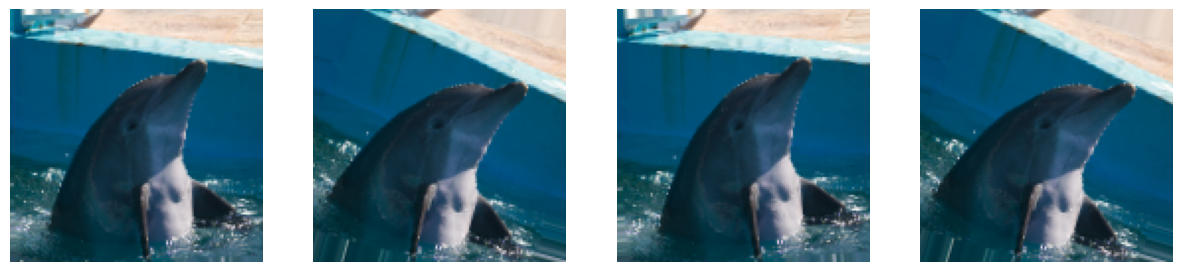

In [32]:
data_generator = ImageDataGenerator(rotation_range=20)
augmented_img_show(data_generator,X_train[img_number].reshape((1,X_train[img_number].shape[0],X_train[img_number].shape[1],X_train[img_number].shape[2])))

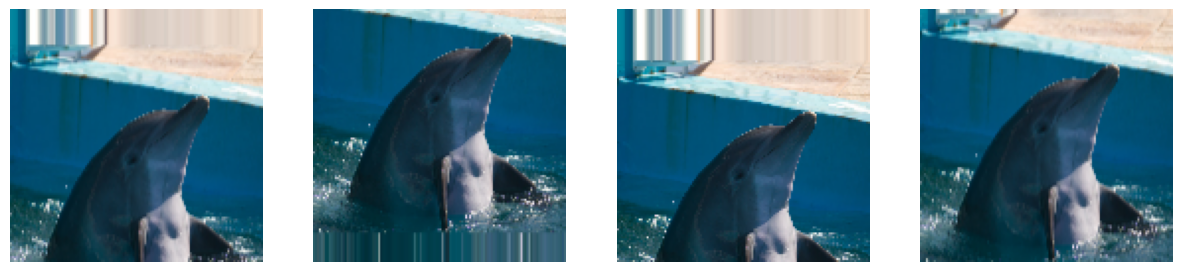

In [33]:
data_generator = ImageDataGenerator(width_shift_range=0.2)
augmented_img_show(data_generator,X_train[img_number].reshape((1,X_train[img_number].shape[0],X_train[img_number].shape[1],X_train[img_number].shape[2])))

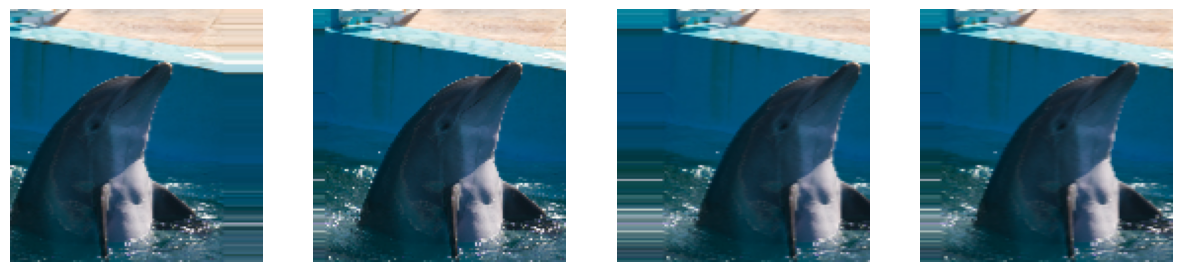

In [34]:
data_generator = ImageDataGenerator(height_shift_range=0.2)
augmented_img_show(data_generator,X_train[img_number].reshape((1,X_train[img_number].shape[0],X_train[img_number].shape[1],X_train[img_number].shape[2])))

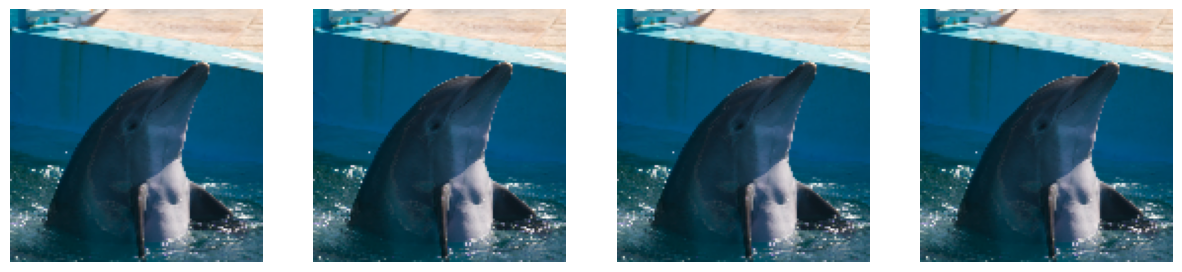

In [35]:
data_generator = ImageDataGenerator(shear_range=0.2)
augmented_img_show(data_generator,X_train[img_number].reshape((1,X_train[img_number].shape[0],X_train[img_number].shape[1],X_train[img_number].shape[2])))

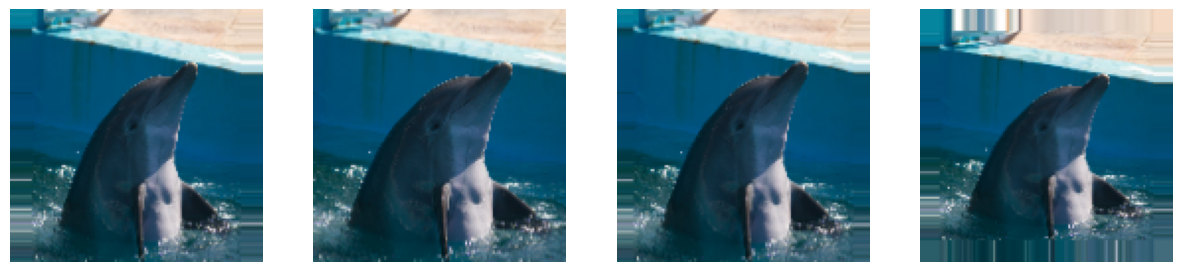

In [36]:
data_generator = ImageDataGenerator(zoom_range=0.2)
augmented_img_show(data_generator,X_train[img_number].reshape((1,X_train[img_number].shape[0],X_train[img_number].shape[1],X_train[img_number].shape[2])))

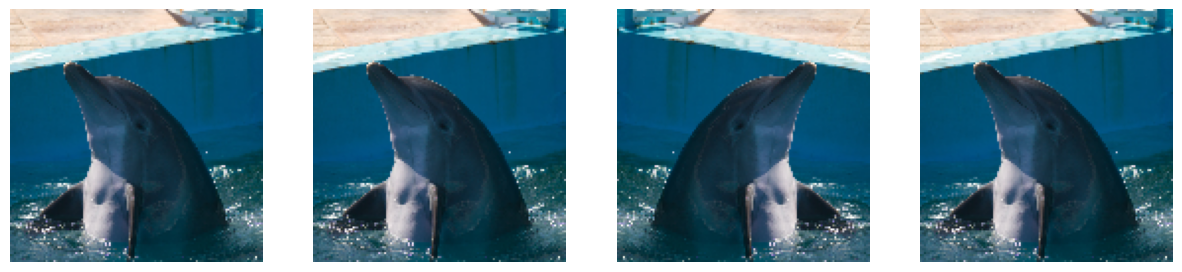

In [37]:
data_generator = ImageDataGenerator(horizontal_flip=True)
augmented_img_show(data_generator,X_train[img_number].reshape((1,X_train[img_number].shape[0],X_train[img_number].shape[1],X_train[img_number].shape[2])))

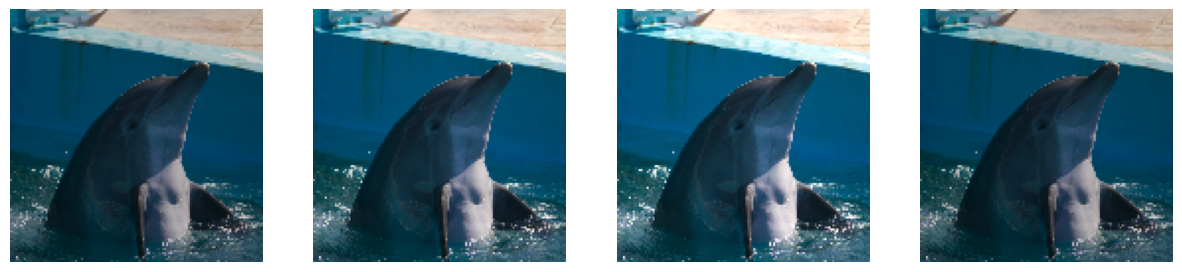

In [38]:
data_generator = ImageDataGenerator(brightness_range=[0.7, 1.3])
augmented_img_show(data_generator,X_train[img_number].reshape((1,X_train[img_number].shape[0],X_train[img_number].shape[1],X_train[img_number].shape[2])))

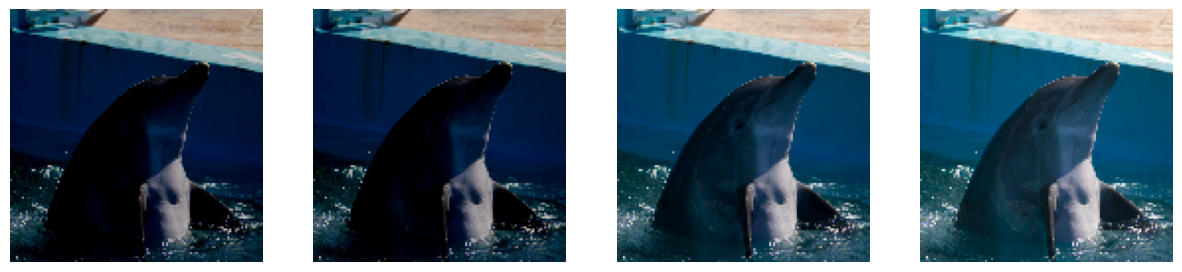

In [39]:
data_generator = ImageDataGenerator(channel_shift_range=100)
augmented_img_show(data_generator,X_train[img_number].reshape((1,X_train[img_number].shape[0],X_train[img_number].shape[1],X_train[img_number].shape[2])))

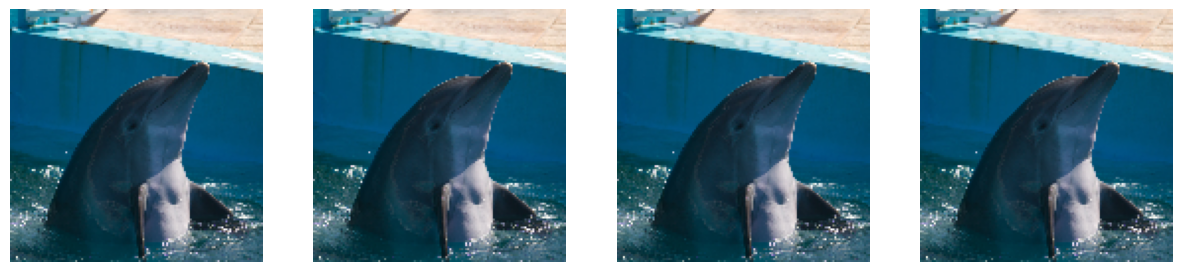

In [40]:
data_generator = ImageDataGenerator(fill_mode='nearest')
augmented_img_show(data_generator,X_train[img_number].reshape((1,X_train[img_number].shape[0],X_train[img_number].shape[1],X_train[img_number].shape[2])))

In [41]:
# Veri arttırma için ImageDataGenerator kullanımı
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,       # Rasgele döndürme: 0-20 derece
    width_shift_range=0.2,   # Genişlikte kaydırma: %20
    height_shift_range=0.2,  # Yükseklikte kaydırma: %20
    shear_range=0.2,         # Kesme dönüşümü
    zoom_range=0.2,          # Yakınlaştırma: %20
    horizontal_flip=True,    # Yatay çevirme
    brightness_range=[0.7, 1.3],  # Parlaklık aralığı: %70 - %130
    channel_shift_range=100,
    fill_mode='nearest',# Boş pikselleri doldurma yöntemi
)

val_datagen = ImageDataGenerator(rescale=1./255,)
test_datagen = ImageDataGenerator(rescale=1./255,)

# Eğitim ve doğrulama verisini hazırlama
train_generator = train_datagen.flow(X_train, y_train, batch_size=64,shuffle=False)
val_generator = val_datagen.flow(X_val, y_val, batch_size=64,shuffle=False)
test_generator = test_datagen.flow(X_test, y_test, batch_size=64,shuffle=False)

Bu kod, veri artırma (data augmentation) için `ImageDataGenerator` sınıfını kullanır. Eğitim verisi üzerinde rastgele döndürme, kaydırma, kesme dönüşümü, yakınlaştırma, yatay çevirme, parlaklık ayarı gibi çeşitli veri artırma teknikleri uygulanır. Doğrulama ve test verileri için ise sadece yeniden ölçeklendirme (`rescale=1./255`) yapılır. 

Eğitim, doğrulama ve test verileri, `train_generator`, `val_generator` ve `test_generator` kullanılarak hazır hale getirilir. Bu oluşturucular, modelin eğitiminde kullanılacak veriyi hazırlar ve veri kümesi boyutunu küçük tutarak belleği verimli kullanır.

### 3-🧪 Model Tasarımı ve Eğitim

In [42]:
tf.get_logger().setLevel('ERROR')
print("TensorFlow versiyonu:", tf.__version__)
print("Kullanılabilir GPU'lar:", tf.config.experimental.list_physical_devices('GPU'))

TensorFlow versiyonu: 2.10.1
Kullanılabilir GPU'lar: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Bu kod, TensorFlow sürümünü ve kullanılabilir GPU'ları görüntüler. Ayrıca, log seviyesini sadece hata mesajlarına sınırlayarak gereksiz mesajları engeller.

In [43]:
# original code is from: https://medium.com/@Vishal_v_cool/visualizing-model-during-training-1c54fd21f348

class PlotLearning(Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

Bu sınıf, modelin eğitim sürecinde öğrenme eğrilerini görselleştirmek için bir `Callback` olarak kullanılır. Eğitim başladığında, modelin izlediği metrikler için boş bir yapı oluşturur. Her epoch'un sonunda, eğitim ve doğrulama metriklerini saklar ve ardından bu metriklerin grafiklerini çizer. Bu grafikler, her metrik için eğitim ve doğrulama değerlerini karşılaştırarak modelin eğitim sürecindeki performansını görsel olarak takip etmeyi sağlar.

In [44]:
num_classes = 10
img_width,img_height=X_train.shape[1],X_train.shape[2]

In [45]:
def get_model(num_classes):
    
    model = Sequential([
        # İlk Convolution Katmanı
        Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(img_width, img_height, 3)),
        MaxPooling2D(pool_size=(2, 2),strides=2),
        
        # İkinci Convolution Katmanı
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2),strides=2),
        
        # Üçüncü Convolution Katmanı
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Dropout(0.2),
        MaxPooling2D(pool_size=(2, 2),strides=2),

        # Dördüncü Convolution Katmanı
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Dropout(0.2),
        MaxPooling2D(pool_size=(2, 2),strides=2),

        Flatten(),
        # Dense Katmanları
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])

    # Compile
    opt = Adam()
    METRICS = ['categorical_accuracy']
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=METRICS)
    return model


Bu fonksiyon, bir derin öğrenme modelini tanımlar. Model, 4 adet konvolüsyonel (Conv2D) katmanından, her birinin ardından MaxPooling2D ve Dropout katmanları içerir. Sonrasında, modelin çıktı katmanı için softmax aktivasyonu ile `num_classes` sayıda çıkış birimi bulunur. Modelin derlenmesinde, kayıp fonksiyonu olarak `categorical_crossentropy` ve doğruluk metriği olarak `categorical_accuracy` kullanılır. 

Farklı model mimarileri geliştirilmiş, ancak overfitting ve "oscillating loss" (dalgalanan kayıp) problemi nedeniyle bu modeller tercih edilmemiştir.

#### 3.1-Modelin Eğitilmesi

In [46]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,          # Öğrenme oranını %50 azalt
    patience=3,          # 3 epoch boyunca iyileşme olmazsa
    min_lr=1e-6          # Minimum öğrenme oranı
)
es=EarlyStopping(
    monitor='val_categorical_accuracy',
    patience=5,
    restore_best_weights=True
)
callbacks_list = [PlotLearning(),es,reduce_lr]

Bu kod, eğitim sırasında doğrulama kaybına göre öğrenme oranını azaltan **ReduceLROnPlateau** ve doğrulama doğruluğunda iyileşme görülmediğinde eğitimi durduran **EarlyStopping** callback'lerini kullanır. Ayrıca, eğitim sürecini görselleştirmek için **PlotLearning** callback'i de eklenir.

In [53]:
get_model(num_classes=num_classes).summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 dropout_15 (Dropout)        (None, 32, 32, 128)      

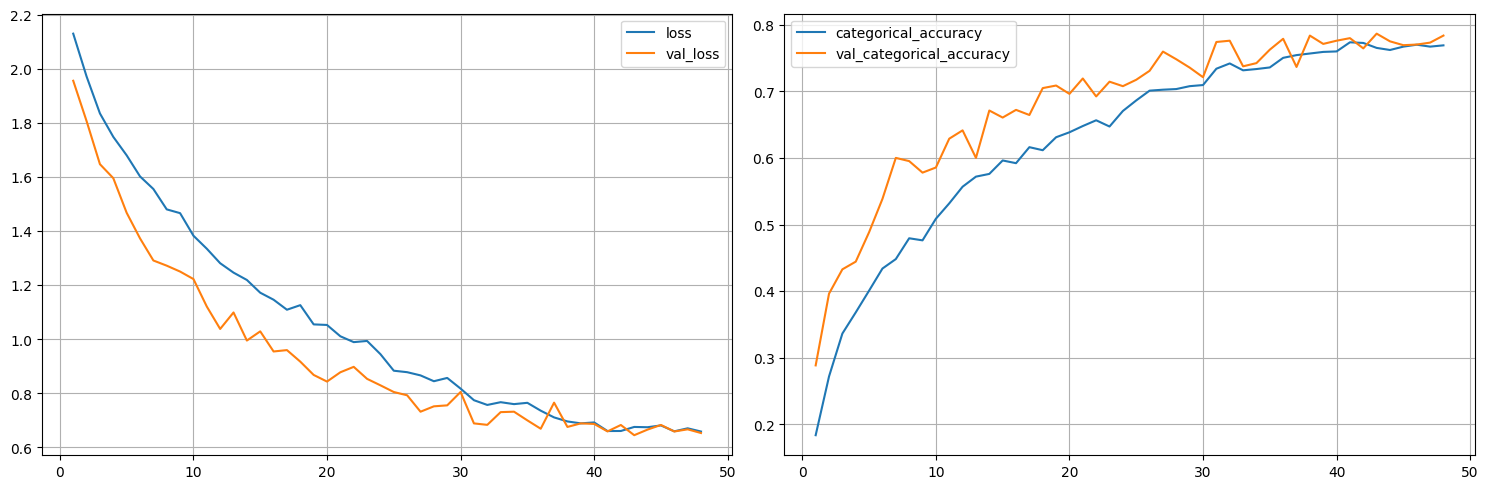

65/65 [==============================] - 22s 340ms/step - loss: 0.6585 - categorical_accuracy: 0.7690 - val_loss: 0.6530 - val_categorical_accuracy: 0.7837 - lr: 3.1250e-05


In [49]:
with tf.device('/GPU:0'):
    gpu_model = get_model(num_classes)
    gpu_model.fit(train_generator,epochs=50,validation_data=val_generator,callbacks=callbacks_list)

Bu kod, modelin eğitimini GPU üzerinde çalıştırır. `get_model(num_classes)` ile model oluşturulur ve `fit` fonksiyonu ile eğitim başlatılır. Eğitim verisi `train_generator` ve doğrulama verisi `val_generator` kullanılarak, belirtilen callback'lerle 50 epoch boyunca eğitim yapılır.

Overfitting ya da Underfitting gözlemlenmemiştir.

#### 3.2-Modelin Değerlendirilmesi

In [100]:
# Evaluate the model on test data
print("Evaluate on test data")
results = gpu_model.evaluate(test_generator)
print("Test loss, test accuracy", results)

Evaluate on test data
21/21 [==============================] - 1s 21ms/step - loss: 0.7199 - categorical_accuracy: 0.7523
Test loss, test accuracy [0.719893217086792, 0.7523077130317688]


Bu kod, modelin test verisi üzerinde değerlendirilmesini sağlar. `gpu_model.evaluate(test_generator)` fonksiyonu, test verisi ile modelin kaybını ve doğruluğunu hesaplar. Sonuçlar daha sonra ekrana yazdırılır. Burada, modelin test kaybı ve doğruluğu gibi metrikler gösterilir.

In [101]:
results_df = pd.DataFrame({
    "Model":"Manuel Olarak Ayarlanmış Model",
    "Veri Seti":"Original Test",
    "Test Loss": [results[0]],
    "Test Accuracy": [results[1]],
})
results_df.head()

Model      Veri Seti  Test Loss  Test Accuracy
0  Manuel Olarak Ayarlanmış Model  Original Test   0.719893       0.752308

In [56]:
y_pred=gpu_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

21/21 [==============================] - 1s 27ms/step


array([4, 7, 2, ..., 7, 0, 5], dtype=int64)

In [57]:
actual_y=np.argmax(y_test,axis=1)
actual_y

array([4, 9, 2, ..., 3, 0, 0], dtype=int64)

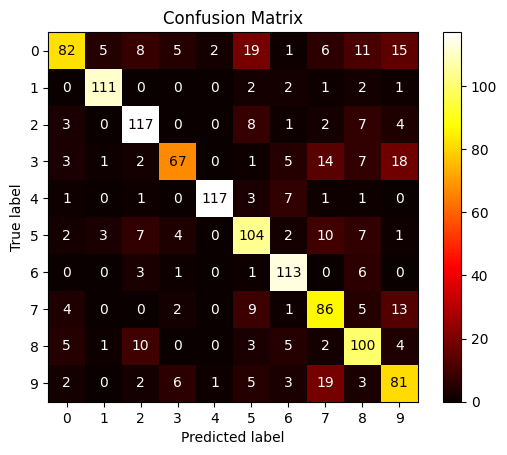

In [58]:
cm = confusion_matrix(actual_y, y_pred_classes)  # Use discrete labels for both inputs
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(len(np.unique(actual_y))))
disp.plot(cmap=plt.cm.hot)
plt.title("Confusion Matrix")
plt.show()

Bu kod, gerçek etiketler ve model tahminleri arasındaki karmaşıklık matrisini oluşturur ve görselleştirir. `ConfusionMatrixDisplay` ile matris ısı haritası tonlarında gösterilir ve modelin sınıf doğruluğu hakkında bilgi verir.

In [59]:
gpu_model.save('../models/animal_classification.keras')

Bu kod, eğitilen modeli `animal_classification.keras` adıyla belirtilen dizine kaydeder. Bu şekilde model, gelecekte yeniden yüklenip kullanılabilir.

In [60]:
gpu_model=tf.keras.models.load_model('../models/animal_classification.keras')

Bu kod, daha önce kaydedilen `animal_classification.keras` modelini belirtilen dosya yolundan yükler ve `gpu_model` değişkenine atar. Bu sayede, model tekrar eğitilmeden kullanılabilir.

### 4-⚙️ Hiperparametre Optimizasyonu

#### 4.1-K-fold Cross Validation

In [62]:

# Denenecek farklı k değerleri
k_values = [3, 5]  # 3-Fold, 5-Fold gibi farklı değerler

# Sonuçları saklamak için bir DataFrame
results_df = pd.DataFrame(columns=['K', 'Fold', 'Loss', 'Accuracy'])

# Farklı k değerleri için döngü
for k in k_values:
    print(f"\nDeneme başlıyor: K = {k}")
    
    # K-Fold Cross Validation
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    
    fold_no = 1
    fold_results = []  # Her fold'un sonuçlarını sakla
    
    for train_index, val_index in kfold.split(X):
        print(f"\nFold {fold_no} / {k}")
        
        # Model oluşturma
        k_fold_model = get_model(num_classes=num_classes)
        with tf.device('/GPU:0'):
            # Modeli eğitme
            k_fold_model.fit(train_generator, epochs=20, batch_size=32,validation_data=val_generator,verbose=1)
        
        # Fold'u değerlendirme
        scores = k_fold_model.evaluate(val_generator, verbose=1)
        print(f"Fold {fold_no} - Loss: {scores[0]:.4f} - Accuracy: {scores[1]:.4f}")
        
        # Sonuçları DataFrame'e ekle
        results_df = pd.concat([results_df, pd.DataFrame({
            'K': [k],
            'Fold': [fold_no],
            'Loss': [scores[0]],
            'Accuracy': [scores[1]]
        })], ignore_index=True)
        
        fold_no += 1

# Sonuçların Özeti
print("\nTüm Sonuçlar:")
print(results_df)

# Ortalama sonuçları hesaplama
average_results = results_df.groupby('K').mean()[['Loss', 'Accuracy']]
print("\nK değerlerine göre Ortalama Sonuçlar:")
print(average_results)



Deneme başlıyor: K = 3

Fold 1 / 3
Epoch 1/20
65/65 [==============================] - 22s 316ms/step - loss: 2.1096 - categorical_accuracy: 0.2012 - val_loss: 1.9251 - val_categorical_accuracy: 0.2846
Epoch 2/20
65/65 [==============================] - 19s 293ms/step - loss: 1.9653 - categorical_accuracy: 0.2784 - val_loss: 1.9083 - val_categorical_accuracy: 0.3067
Epoch 3/20
65/65 [==============================] - 19s 295ms/step - loss: 1.8791 - categorical_accuracy: 0.3118 - val_loss: 1.6143 - val_categorical_accuracy: 0.4240
Epoch 4/20
65/65 [==============================] - 20s 304ms/step - loss: 1.7797 - categorical_accuracy: 0.3608 - val_loss: 1.6511 - val_categorical_accuracy: 0.4183
Epoch 5/20
65/65 [==============================] - 20s 310ms/step - loss: 1.7249 - categorical_accuracy: 0.3839 - val_loss: 1.4791 - val_categorical_accuracy: 0.4865
Epoch 6/20
65/65 [==============================] - 19s 286ms/step - loss: 1.6426 - categorical_accuracy: 0.4207 - val_loss: 1.35

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9828\3997509887.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame({


Epoch 1/20
65/65 [==============================] - 22s 320ms/step - loss: 2.1399 - categorical_accuracy: 0.1897 - val_loss: 1.9348 - val_categorical_accuracy: 0.3298
Epoch 2/20
65/65 [==============================] - 20s 309ms/step - loss: 1.9345 - categorical_accuracy: 0.2918 - val_loss: 1.7019 - val_categorical_accuracy: 0.4058
Epoch 3/20
65/65 [==============================] - 23s 359ms/step - loss: 1.8348 - categorical_accuracy: 0.3401 - val_loss: 1.5962 - val_categorical_accuracy: 0.4798
Epoch 4/20
65/65 [==============================] - 23s 350ms/step - loss: 1.7309 - categorical_accuracy: 0.3906 - val_loss: 1.4531 - val_categorical_accuracy: 0.5231
Epoch 5/20
65/65 [==============================] - 23s 347ms/step - loss: 1.6476 - categorical_accuracy: 0.4065 - val_loss: 1.4031 - val_categorical_accuracy: 0.5173
Epoch 6/20
65/65 [==============================] - 25s 380ms/step - loss: 1.6080 - categorical_accuracy: 0.4425 - val_loss: 1.3451 - val_categorical_accuracy: 0.523

Bu kod, farklı `k` değerleri için K-Fold Cross Validation ile modelin performansını değerlendirir. Her `k` değeri için model farklı katmanlarda eğitilir, doğrulama verisi üzerinde kayıp ve doğruluk hesaplanır. Sonuçlar bir DataFrame'e kaydedilir ve her `k` için ortalama kayıp ve doğruluk hesaplanarak özetlenir.

`k=3` en iyi doğruluğa sahip. Bu, 3-Fold Cross Validation'ın model için en uygun seçenek olduğunu ve daha yüksek k değerlerinde doğruluğun düştüğünü gösterir. 

#### 4.2-BayesianOptimization

In [63]:

def create_model(cnn_neurons,neuron_count,dense_neurons,dropout,activation):
    if activation == "leaky_relu":
        activation_fn = LeakyReLU(alpha=0.1)
    else:
        activation_fn = activation
    model = Sequential()

    # İlk katman - Giriş Katmanı
    model.add(Conv2D(cnn_neurons, (3, 3), activation=activation_fn, padding='same', input_shape=(img_width, img_height, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

    # Dinamik olarak konvolüsyon katmanları ekleniyor
    filters = cnn_neurons  # İkinci katmandan itibaren kullanılacak başlangıç filtre sayısı
    for i in range(1, neuron_count):
        model.add(Conv2D(filters, (3, 3), activation=activation_fn, padding='same'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
        filters *= 2  # Her katmanda filtre sayısını artırıyoruz (64, 128, 256 ...)

    # Flatten ve Dense Katmanları
    model.add(Flatten())
    model.add(Dense(dense_neurons, activation=activation_fn))
    model.add(Dropout(dropout))
    model.add(Dense(num_classes, activation='softmax'))


    # Derleme
    METRICS = ['categorical_accuracy', tf.metrics.Precision(), tf.metrics.Recall()]
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=METRICS)

    return model

Bu fonksiyon, verilen hiperparametrelerle dinamik bir CNN modeli oluşturur. İlk konvolüsyon katmanlarından sonra, her katmanda filtre sayısını artırır ve ardından dense katmanlar ekler. Model, "categorical_crossentropy" kaybı ve doğruluk, precision, recall metrikleriyle derlenir.

In [64]:
def build_model(hp):
    cnn_neurons=hp.Choice("units1",[32,64])
    dense_neurons=hp.Choice("units2",[128,256,512])
    neuron_count=hp.Int("unitCount",min_value=1,max_value=3,step=1)
    dropout=hp.Choice("dropout",[0.2,0.3,0.5])
    activation=hp.Choice("activation",values=["relu","elu","leaky_relu"])
    model=create_model(cnn_neurons=cnn_neurons,dense_neurons=dense_neurons,neuron_count=neuron_count,dropout=dropout,activation=activation)
    return model


tuner =kt.BayesianOptimization(
    build_model,
    objective="val_loss",
    max_trials=10,
    overwrite=True)
with tf.device('/GPU:0'):
    tuner.search(train_generator,epochs=20,validation_data=val_generator,verbose=1)

Trial 10 Complete [00h 07m 19s]
val_loss: 1.0983104705810547

Best val_loss So Far: 0.8327248096466064
Total elapsed time: 01h 16m 00s


Bu kod, Keras Tuner kullanarak model hiperparametrelerini optimize etmek için bir arama yapar. `build_model` fonksiyonu, hiperparametreler (CNN katmanlarındaki nöron sayısı, dense katmanlarındaki nöron sayısı, katman sayısı, dropout oranı ve aktivasyon fonksiyonu) üzerinde seçim yaparak modelin yapısını oluşturur. `BayesianOptimization` ile hiperparametrelerin optimize edilmesi sağlanır. Model, belirtilen eğitim ve doğrulama veri setleri ile 10 denemede eğitilir ve her denemede doğrulama kaybı (`val_loss`) izlenir. Bu süreç, en iyi model hiperparametrelerini bulmaya yöneliktir.

In [65]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# En iyi hiperparametrelerin değerlerini yazdır
print("Best Hyperparameter Values:")
for param in best_hps.values:
    print(f"{param}: {best_hps.get(param)}")

Best Hyperparameter Values:
units1: 32
units2: 512
unitCount: 3
dropout: 0.2
activation: relu


Yapılan hiperparametre optimizasyonunun sonucu yukarıdaki gibidir.

#### 4.3-Modelin yeniden eğitilmesi

Hiperparametre optimizassyonuna göre düzenlenen model ile eğitim yeniden gerçekleştirilir.

In [68]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,          # Öğrenme oranını %50 azalt
    patience=3,          # 3 epoch boyunca iyileşme olmazsa
    min_lr=1e-6          # Minimum öğrenme oranı
)
es=EarlyStopping(
    monitor='val_categorical_accuracy',
    patience=10,
    restore_best_weights=True
)
callbacks_list = [PlotLearning(),es,reduce_lr]

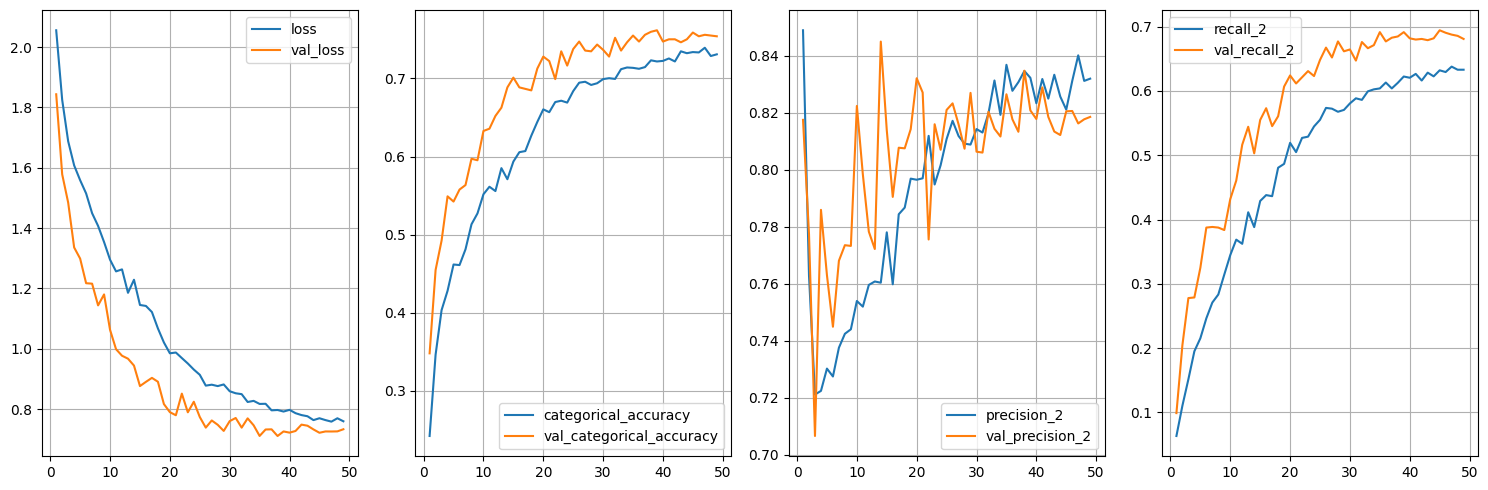

65/65 [==============================] - 23s 355ms/step - loss: 0.7600 - categorical_accuracy: 0.7308 - precision_2: 0.8319 - recall_2: 0.6329 - val_loss: 0.7336 - val_categorical_accuracy: 0.7538 - val_precision_2: 0.8185 - val_recall_2: 0.6808 - lr: 1.5625e-05


In [69]:
with tf.device('/GPU:0'):
    new_model = create_model(cnn_neurons=32,neuron_count=3,dense_neurons=512,dropout=0.2,activation="relu")
    new_model.fit(train_generator,epochs=50,validation_data=val_generator,callbacks=callbacks_list)

Hiper parametre optimizasyonuna göre yeniden düzenlenen model eğitimi yukarıda görülmektedir.

Overfitting ya da Underfitting gözlemlenmemiştir. Model doyuma ulaşmıştır.

In [102]:
# Evaluate the model on test data
print("Evaluate on test data")
results = new_model.evaluate(test_generator)
print("Test loss, test accuracy, precision, recall", results)

Evaluate on test data
21/21 [==============================] - 1s 22ms/step - loss: 0.8245 - categorical_accuracy: 0.7308 - precision_2: 0.7982 - recall_2: 0.6723
Test loss, test accuracy, precision, recall [0.8244636654853821, 0.7307692170143127, 0.7981734871864319, 0.6723076701164246]


In [103]:
results[1]

0.7307692170143127

In [104]:
new_row = {
    "Model": "Hiper Parametre Optimizasyonu ile Ayarlanmış model",
    "Veri Seti": "Original Test",
    "Test Loss": results[0],
    "Test Accuracy": results[1],
}

# DataFrame'e yeni satırı ekle
results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)
results_df.head()

Model  ... Test Accuracy
0                     Manuel Olarak Ayarlanmış Model  ...      0.752308
1  Hiper Parametre Optimizasyonu ile Ayarlanmış m...  ...      0.730769

[2 rows x 4 columns]

Tablodan da anlaşılacağı üzere, `Manuel Olarak Ayarlanmış Model`, `Hiperparametre Optimizasyonu ile Elde Edilen Model`e kıyasla daha iyi performans göstermiştir. Bu durumun, hiperparametre optimizasyon sürecinde kullanılan epoch sayısı veya maksimum deneme (max_trials) sınırlandırmalarından kaynaklandığı düşünülmektedir. Daha yüksek epoch ve deneme sayılarıyla optimizasyonun yeniden gerçekleştirilmesinin, model performansında iyileşme sağlayabileceği öngörülmektedir.

In [82]:
y_pred=new_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

21/21 [==============================] - 1s 26ms/step


array([4, 7, 2, ..., 7, 5, 5], dtype=int64)

In [83]:
actual_y=np.argmax(y_test,axis=1)
actual_y

array([4, 9, 2, ..., 3, 0, 0], dtype=int64)

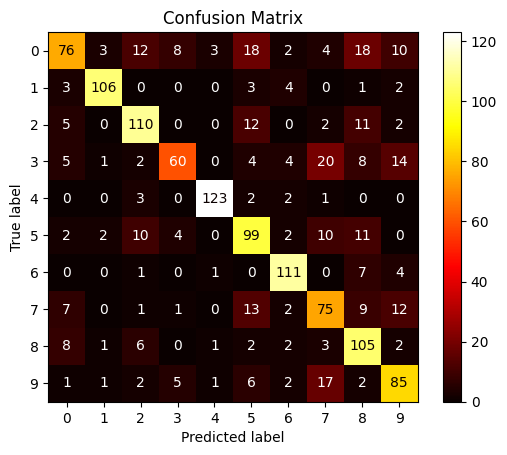

In [84]:
cm = confusion_matrix(actual_y, y_pred_classes)  # Use discrete labels for both inputs
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(len(np.unique(actual_y))))
disp.plot(cmap=plt.cm.hot)
plt.title("Confusion Matrix")
plt.show()

In [85]:
new_model.save('../models/animal_classification_new.keras')

Hiper parametre optimizasyonu ile elde edilen model de daha sonra kullanılmak üzere kaydedilir.

In [86]:
new_model=tf.keras.models.load_model('../models/animal_classification_new.keras')

### 5-💡 Test Seti Manipülasyonu ve Performans Analizi

In [87]:
sys.path.insert(0, "..")
# Custom utility functions
from utilities import get_manipulated_images, get_wb_images

Bu kod, Python'un `sys.path` listesine bir dizin (`".."`) ekler. Bu, üst dizine (bir seviyeyi yukarıya) gitmeyi sağlar ve bu dizindeki modüllerin import edilmesine olanak tanır. Yani, bu komutla, üst dizinde bulunan Python dosyaları ve modülleri, şu anki çalışma ortamında erişilebilir hale gelir.

In [88]:
X_test_manipulated_purplish=[get_manipulated_images(cv2.cvtColor(originals, cv2.COLOR_BGR2RGB) / 255.0)[0] for originals in X_test]
X_test_manipulated_yellowish=[get_manipulated_images(cv2.cvtColor(originals, cv2.COLOR_BGR2RGB) / 255.0)[1] for originals in X_test]
X_test_manipulated_greenish=[get_manipulated_images(cv2.cvtColor(originals, cv2.COLOR_BGR2RGB) / 255.0)[2] for originals in X_test]

Bu kod, `X_test` veri setindeki her bir görüntü için üç farklı manipülasyon gerçekleştirir. İlk olarak, her resim RGB formatına dönüştürülür ve normalize edilir (0-1 arası değere getirilir). Sonrasında, `get_manipulated_images()` fonksiyonu çağrılarak her resim için üç farklı renk manipülasyonu yapılır:

1. `X_test_manipulated_purplish`: Görüntü, mor tonlarında manipüle edilir.
2. `X_test_manipulated_yellowish`: Görüntü, sarımsı tonlarda manipüle edilir.
3. `X_test_manipulated_greenish`: Görüntü, yeşilimsi tonlarda manipüle edilir.

Bu işlem, her bir görselin farklı renk manipülasyonlarına tabi tutulmuş versiyonlarını oluşturur.

Text(0.5, 1.0, 'Original image')

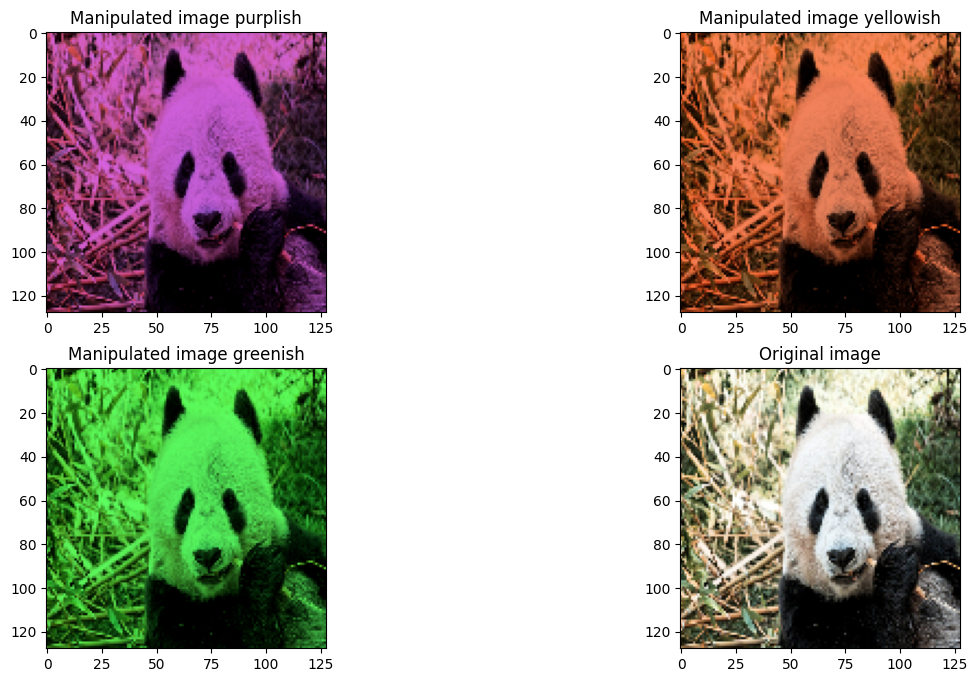

In [89]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.imshow(X_test_manipulated_purplish[0][..., ::-1])
plt.title("Manipulated image purplish")

plt.subplot(2,2,2)
plt.imshow(X_test_manipulated_yellowish[0][..., ::-1])
plt.title("Manipulated image yellowish")

plt.subplot(2,2,3)
plt.imshow(X_test_manipulated_greenish[0][..., ::-1])
plt.title("Manipulated image greenish")

plt.subplot(2,2,4)
plt.imshow(X_test[0][..., ::-1])
plt.title("Original image")

In [90]:
X_test_manipulated_purplish_array=np.array(X_test_manipulated_purplish)
X_test_manipulated_yellowish_array=np.array(X_test_manipulated_yellowish)
X_test_manipulated_greenish_array=np.array(X_test_manipulated_greenish)

In [91]:
test_generator_manipulated_purplish = test_datagen.flow(X_test_manipulated_purplish_array, y_test, batch_size=64,shuffle=False)
test_generator_manipulated_yellowish = test_datagen.flow(X_test_manipulated_yellowish_array, y_test, batch_size=64,shuffle=False)
test_generator_manipulated_greenish = test_datagen.flow(X_test_manipulated_greenish_array, y_test, batch_size=64,shuffle=False)

Bu kod, üç farklı renk manipülasyonuna sahip test verilerini içeren üç ayrı test oluşturucu oluşturur. İlk oluşturucu, mor tonlarla manipüle edilmiş verileri, ikinci oluşturucu sarı tonlarla manipüle edilmiş verileri, üçüncü oluşturucu ise yeşil tonlarla manipüle edilmiş verileri içerir. Her oluşturucu, `test_datagen.flow()` fonksiyonu ile oluşturulur ve her biri 64'lük batch size ile karıştırılmadan (shuffle=False) veri sağlar. Bu oluşturucular, modelin test edilmesi sırasında kullanılmak üzere hazırlanmıştır.

In [106]:
print("Evaluate on test data")
results_purplish = gpu_model.evaluate(test_generator_manipulated_purplish)
results_yellowish = gpu_model.evaluate(test_generator_manipulated_yellowish)
results_greenish = gpu_model.evaluate(test_generator_manipulated_greenish)
print("Test loss, test accuracy for purplish", results_purplish)
print("Test loss, test accuracy for yellowish", results_yellowish)
print("Test loss, test accuracy for greenish", results_greenish)

Evaluate on test data
21/21 [==============================] - 0s 20ms/step - loss: 5.7300 - categorical_accuracy: 0.1108
Test loss, test accuracy for purplish [2.752260446548462, 0.2461538463830948]
Test loss, test accuracy for yellowish [2.207090139389038, 0.32615384459495544]
Test loss, test accuracy for greenish [5.729992866516113, 0.11076922714710236]


In [107]:
new_row_purplish = {
    "Model": "Manuel Olarak Ayarlanmış Model",
    "Veri Seti": "Purplish Test Set",
    "Test Loss": results_purplish[0],
    "Test Accuracy": results_purplish[1],
}
new_row_yellowish = {
    "Model": "Manuel Olarak Ayarlanmış Model",
    "Veri Seti": "Yellowish Test Set",
    "Test Loss": results_yellowish[0],
    "Test Accuracy": results_yellowish[1],
}
new_row_greenish = {
    "Model": "Manuel Olarak Ayarlanmış Model",
    "Veri Seti": "Greenish Test Set",
    "Test Loss": results_greenish[0],
    "Test Accuracy": results_greenish[1],
}

# DataFrame'e yeni satırı ekle
results_df = pd.concat([results_df, pd.DataFrame([new_row_purplish])], ignore_index=True)
results_df = pd.concat([results_df, pd.DataFrame([new_row_yellowish])], ignore_index=True)
results_df = pd.concat([results_df, pd.DataFrame([new_row_greenish])], ignore_index=True)
results_df.head()

Model  ... Test Accuracy
0                     Manuel Olarak Ayarlanmış Model  ...      0.752308
1  Hiper Parametre Optimizasyonu ile Ayarlanmış m...  ...      0.730769
2                     Manuel Olarak Ayarlanmış Model  ...      0.246154
3                     Manuel Olarak Ayarlanmış Model  ...      0.326154
4                     Manuel Olarak Ayarlanmış Model  ...      0.110769

[5 rows x 4 columns]

Manipüle edilmiş test veri setlerine bakıldığında, "Manuel Olarak Ayarlanmış Model"in performansının ciddi şekilde düştüğü görülmektedir. Örneğin:

- Purplish Test Set'te test kaybı 2.75’e yükselirken doğruluk yalnızca %24.61’e düşmüştür.
- Yellowish Test Set'te test kaybı 2.21, doğruluk ise %32.61’dir.
- Greenish Test Set'te performans en düşük seviyededir: Test kaybı 5.73, doğruluk %11.08.
Bu sonuçlar, modelin manipüle edilmiş renk tonlarına karşı oldukça duyarlı olduğunu ve bu tür veri dağılımlarına karşı genelleme kapasitesinin zayıf olduğunu göstermektedir. Özellikle Greenish Test Set’teki düşük performans, modelin bu tür manipülasyonlara karşı dayanıklılığının artırılması gerektiğini açıkça ortaya koymaktadır.

### 6-🎨 Renk Sabitliği (Color Constancy)

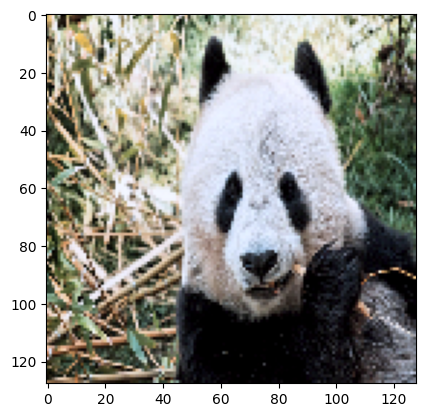

In [94]:
test_image_blank = get_wb_images(cv2.cvtColor(X_test_manipulated_purplish[0], cv2.COLOR_BGR2RGB) / 255.0)
plt.imshow(test_image_blank)

Yukarıda White Balance Kodu test edilmiştir.

In [95]:
X_test_wb_purplish=[cv2.cvtColor((get_wb_images(cv2.cvtColor(manipulated, cv2.COLOR_BGR2RGB) / 255.0)*255).astype(np.uint8), cv2.COLOR_RGB2BGR) for manipulated in X_test_manipulated_purplish]
X_test_wb_yellowish=[cv2.cvtColor((get_wb_images(cv2.cvtColor(manipulated, cv2.COLOR_BGR2RGB) / 255.0)*255).astype(np.uint8), cv2.COLOR_RGB2BGR) for manipulated in X_test_manipulated_yellowish]
X_test_wb_greenish=[cv2.cvtColor((get_wb_images(cv2.cvtColor(manipulated, cv2.COLOR_BGR2RGB) / 255.0)*255).astype(np.uint8), cv2.COLOR_RGB2BGR) for manipulated in X_test_manipulated_greenish]

d:\MuhammetAliVarlik\Anaconda\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\MuhammetAliVarlik\Anaconda\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9828\3741165130.py:1: RuntimeWarning: invalid value encountered in cast
  X_test_wb_purplish=[cv2.cvtColor((get_wb_images(cv2.cvtColor(manipulated, cv2.COLOR_BGR2RGB) / 255.0)*255).astype(np.uint8), cv2.COLOR_RGB2BGR) for manipulated in X_test_manipulated_purplish]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9828\3741165130.py:2: RuntimeWarning: invalid value encountered in cast
  X_test_wb_yellowish=[cv2.cvtColor((get_wb_images(cv2.cvtColor(manipulated, cv2.COLOR_BGR2RGB) / 255.0)*255).astype(np.uint8), cv2.COLOR_RGB2BGR) for manipulated in X_test_manipulated_yellowish]
C:\Users\A

Bu kod, farklı renk manipülasyonları (mor, sarı, yeşil) ile test verilerine beyaz dengesi düzeltmesi uygular. Her bir görüntü RGB formatına dönüştürülüp normalize edilir, ardından `get_wb_images()` fonksiyonu ile beyaz dengesi düzeltilir. Sonuçlar tekrar BGR formatına çevrilir ve `uint8` olarak kaydedilir.

Text(0.5, 1.0, 'White Balance Uygulanmış Resim')

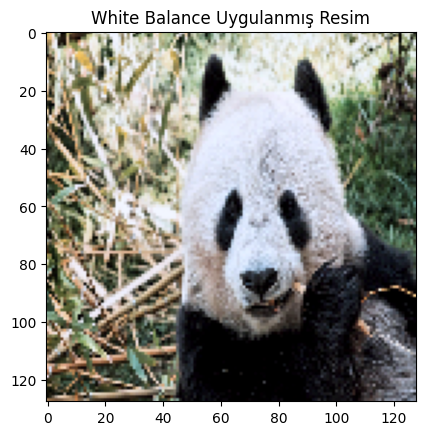

In [96]:
plt.imshow(X_test_wb_purplish[0][..., ::-1])
plt.title("White Balance Uygulanmış Resim")

In [97]:
X_test_wb_purplish_array=np.array(X_test_wb_purplish)
X_test_wb_yellowish_array=np.array(X_test_wb_yellowish)
X_test_wb_greenish_array=np.array(X_test_wb_greenish)

In [98]:
test_generator_wb_purplish = test_datagen.flow(X_test_wb_purplish_array, y_test, batch_size=64,shuffle=False)
test_generator_wb_yellowish = test_datagen.flow(X_test_wb_yellowish_array, y_test, batch_size=64,shuffle=False)
test_generator_wb_greenish = test_datagen.flow(X_test_wb_greenish_array, y_test, batch_size=64,shuffle=False)

Bu kod, beyaz dengesi düzeltilmiş test verileri için üç ayrı test oluşturucu oluşturur. Her bir oluşturucu, sırasıyla mor, sarı ve yeşil tonlarla manipüle edilmiş test görüntülerini içerir. Her biri 64'lük batch size ile, karıştırılmadan (shuffle=False) veri sağlar ve `test_datagen.flow()` fonksiyonu ile test veri oluşturucuları oluşturulur.

In [108]:
print("Evaluate on test data")
results_purplish_wb = gpu_model.evaluate(test_generator_wb_purplish)
results_yellowish_wb = gpu_model.evaluate(test_generator_wb_yellowish)
results_greenish_wb = gpu_model.evaluate(test_generator_wb_greenish)
print("Test loss, test accuracy for purplish", results_purplish_wb)
print("Test loss, test accuracy for yellowish", results_yellowish_wb)
print("Test loss, test accuracy for greenish", results_greenish_wb)


Evaluate on test data
21/21 [==============================] - 0s 20ms/step - loss: 0.7763 - categorical_accuracy: 0.7346
Test loss, test accuracy for purplish [0.7627585530281067, 0.7315384745597839]
Test loss, test accuracy for yellowish [0.7728191018104553, 0.7315384745597839]
Test loss, test accuracy for greenish [0.7763334512710571, 0.7346153855323792]


In [109]:
new_row_purplish_wb = {
    "Model": "Manuel Olarak Ayarlanmış Model",
    "Veri Seti": "Purplish Test Set WB uygulanmış",
    "Test Loss": results_purplish_wb[0],
    "Test Accuracy": results_purplish_wb[1],
}
new_row_yellowish_wb = {
    "Model": "Manuel Olarak Ayarlanmış Model",
    "Veri Seti": "Yellowish Test Set WB uygulanmış",
    "Test Loss": results_yellowish_wb[0],
    "Test Accuracy": results_yellowish_wb[1],
}
new_row_greenish_wb = {
    "Model": "Manuel Olarak Ayarlanmış Model",
    "Veri Seti": "Greenish Test Set WB uygulanmış",
    "Test Loss": results_greenish_wb[0],
    "Test Accuracy": results_greenish_wb[1],
}

# DataFrame'e yeni satırı ekle
results_df = pd.concat([results_df, pd.DataFrame([new_row_purplish_wb])], ignore_index=True)
results_df = pd.concat([results_df, pd.DataFrame([new_row_yellowish_wb])], ignore_index=True)
results_df = pd.concat([results_df, pd.DataFrame([new_row_greenish_wb])], ignore_index=True)
results_df.head()

Model  ... Test Accuracy
0                     Manuel Olarak Ayarlanmış Model  ...      0.752308
1  Hiper Parametre Optimizasyonu ile Ayarlanmış m...  ...      0.730769
2                     Manuel Olarak Ayarlanmış Model  ...      0.246154
3                     Manuel Olarak Ayarlanmış Model  ...      0.326154
4                     Manuel Olarak Ayarlanmış Model  ...      0.110769

[5 rows x 4 columns]

In [110]:
results_df

Model  ... Test Accuracy
0                     Manuel Olarak Ayarlanmış Model  ...      0.752308
1  Hiper Parametre Optimizasyonu ile Ayarlanmış m...  ...      0.730769
2                     Manuel Olarak Ayarlanmış Model  ...      0.246154
3                     Manuel Olarak Ayarlanmış Model  ...      0.326154
4                     Manuel Olarak Ayarlanmış Model  ...      0.110769
5                     Manuel Olarak Ayarlanmış Model  ...      0.731538
6                     Manuel Olarak Ayarlanmış Model  ...      0.731538
7                     Manuel Olarak Ayarlanmış Model  ...      0.734615

[8 rows x 4 columns]

Manipüle edilmiş veri setlerine **WB (White Balance)** uygulanmasıyla modelin performansında belirgin bir iyileşme sağlanmıştır:
- **Purplish Test Set WB uygulanmış**: Test kaybı **0.76**, doğruluk **%73.15**.
- **Yellowish Test Set WB uygulanmış**: Test kaybı **0.77**, doğruluk **%73.15**.
- **Greenish Test Set WB uygulanmış**: Test kaybı **0.78**, doğruluk **%73.46**.

Bu sonuçlar, **WB uygulamasının** manipüle edilmiş veri setlerinde model performansını neredeyse orijinal test veri setindeki seviyelere çıkardığını göstermektedir. Özellikle, Greenish Test Set’te doğruluğun **%11.08’den %73.46’ya** yükselmesi, WB'nin etkisini çarpıcı bir şekilde ortaya koymaktadır.

Manipüle edilmiş veri setlerindeki düşük performans, modelin renk manipülasyonlarına karşı duyarlılığını ve genelleme eksikliğini göstermektedir. Ancak WB uygulaması, bu sorunları önemli ölçüde hafifleterek modelin genelleme kapasitesini artırmıştır. Bu, özellikle görüntü manipülasyonlarının yaygın olduğu gerçek dünya senaryolarında WB gibi ön işleme tekniklerinin kritik bir rol oynayabileceğini ortaya koymaktadır.

### 7-🌟 Tartışma ve Sonuç

#### 7.1-Grafiksel Analiz

Elde edilen sonuçlar, grafiksel olarak sunulmuş ve görsel analizlerle detaylandırılmıştır.

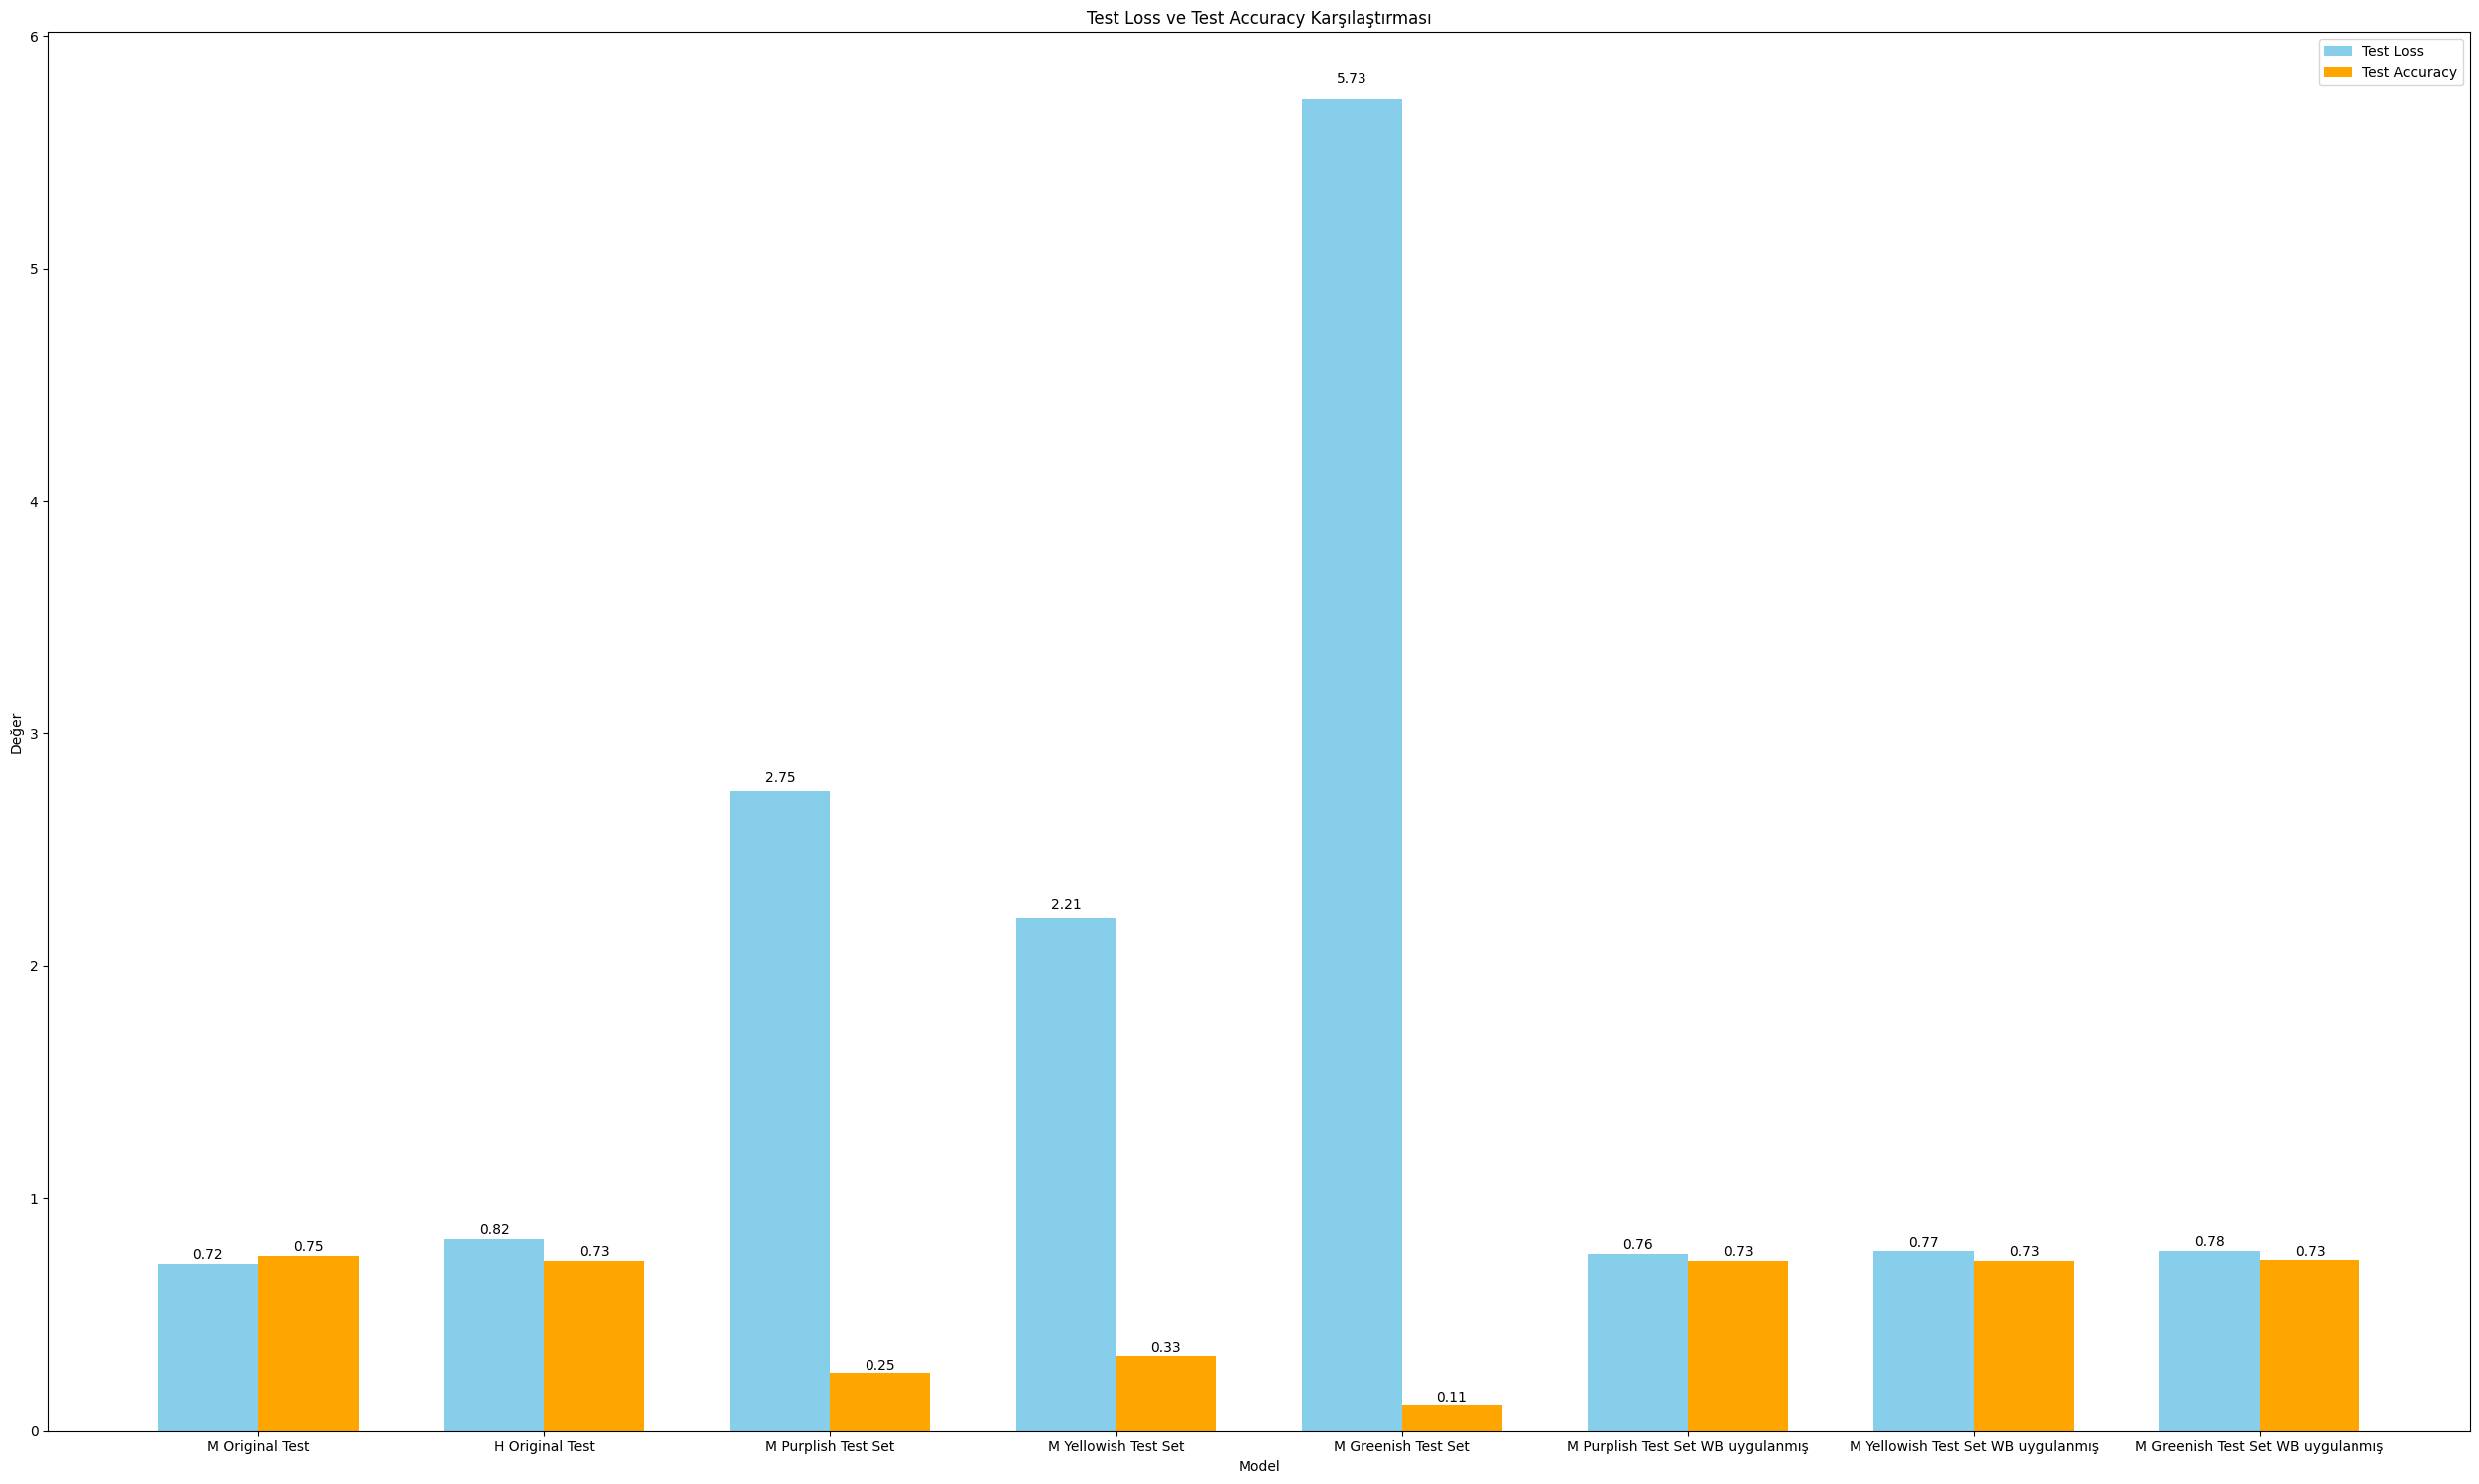

In [130]:
x = np.arange(len(results_df))  # Model sayısı kadar indeks
width = 0.35  # Bar genişliği

# Grafik oluşturma
fig, ax = plt.subplots(figsize=(25, 15))
bar1 = ax.bar(x - width/2, results_df['Test Loss'], width, label='Test Loss', color='skyblue')
bar2 = ax.bar(x + width/2, results_df['Test Accuracy'], width, label='Test Accuracy', color='orange')

# Etiketler, başlık ve eksen isimleri
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1.01*height, f'{height:.2f}', ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

ax.set_xlabel('Model')
ax.set_ylabel('Değer')
ax.set_title('Test Loss ve Test Accuracy Karşılaştırması')
ax.set_xticks(x)
ax.set_xticklabels([label[:1] + " " + veri for label, veri in zip(results_df['Model'], results_df['Veri Seti'])])
ax.legend()

plt.tight_layout()
plt.show()

Grafiksel analizler, manuel olarak ayarlanmış modelin hiperparametre optimizasyonu ile ayarlanmış modele kıyasla daha iyi performans sergilediğini göstermektedir. Bu nedenle, proje sürecine manuel ayarlanmış model ile devam edilmiştir. Ardından, manipüle edilmiş veri setleri üzerinde testler gerçekleştirilmiş olup, modelin manipüle edilmiş veri setlerindeki performansında belirgin bir düşüş yaşandığı gözlemlenmiştir. Bununla birlikte, aynı veri setlerine uygulanan beyaz dengeleme (white balance) işlemi sonrasında, elde edilen sonuçların orijinal veri setine çok yakın olduğu tespit edilmiştir.

#### 7.2-Manipülasyona Karşı Alınabilecek Önlemler

Modelin manipüle edilmiş verilere dayanıklı olmasını sağlamak için birkaç yöntem önerilebilir:

- İlk olarak, daha agresif veri artırma tekniklerinin kullanılması, modelin çeşitli veri varyasyonlarına karşı daha esnek hale gelmesine yardımcı olabilir. Bu teknikler, modelin eğitim sürecinde daha fazla veri çeşitliliği sunarak, farklı koşullara uyum sağlamasına olanak tanır.

- İkinci olarak, modelin eğitim sürecinde transfer öğrenme yöntemlerinin kullanılması, daha geniş ve çeşitli veri kümeleri üzerinde eğitilmiş önceden öğrenilmiş modellerin manipüle edilmiş verilere daha etkili bir şekilde adapte olmasına olanak tanıyabilir. Bu yaklaşım, modelin daha genelleştirilmiş özellikleri öğrenmesini sağlayarak, manipülasyonlardan kaynaklanan performans kayıplarını en aza indirebilir.

- Üçüncü olarak, modelin manipüle edilmiş verilerle eğitilmesi, modelin bu tür verilere karşı daha dayanıklı hale gelmesini sağlayabilir. Manipülasyonlarla zenginleştirilmiş veri setleri, modelin bu tür bozulmalara daha iyi tepki vermesini mümkün kılabilir.

- Son olarak, modelin eğitim aşamasında verinin doğru etiketlendirilmesi ve dikkatli bir veri ön işleme sürecinin uygulanması, manipülasyonlardan kaynaklanabilecek hatalı öğrenmeyi engellemek için kritik bir rol oynayabilir. Bu aşamalar, modelin doğru bilgiyle eğitilmesini ve manipülasyonların etkilerini en aza indirmesini sağlar.

#### 7.3-Önerilen Yöntemlerden Modelin Manipüle Edilmiş Verilerle Yeniden Eğitilmesi

In [135]:
import random

new_X_train=[get_manipulated_images(cv2.cvtColor(originals, cv2.COLOR_BGR2RGB) / 255.0)[random.choice([0, 1, 2])] for originals in X_train]
new_y_train=y_train

Kod, eğitim verisini manipüle etmek amacıyla her bir orijinal görüntüye üç farklı manipülasyon türünden birini rastgele uygular. İlk olarak, `X_train` verisindeki her bir orijinal görüntü için `get_manipulated_images` fonksiyonu çağrılır. Bu fonksiyon her görüntü için üç farklı manipülasyon (örneğin, `purplish`, `yellowish`, `greenish`) döndürür. Ardından, her görüntü için bu manipülasyonlardan birini seçmek amacıyla `random.choice([0, 1, 2])` fonksiyonu kullanılır. Seçilen manipülasyon, görüntü önce RGB formatına çevrilip normalleştirilerek uygulanır. Son olarak, her bir görüntü manipüle edilmiş bir versiyonuna dönüştürülür ve `new_X_train` adlı yeni eğitim veri kümesi oluşturulur. Bu süreçte, `y_train` etiketleri değişmeden kalır ve `new_y_train` olarak atanır. Bu işlem, modelin manipüle edilmiş verilerle eğitilmesi amacını taşır.

In [138]:
new_X_train=np.array(new_X_train)
new_y_train=np.array(new_y_train)

In [139]:
new_X_train, new_X_val, new_y_train, new_y_val = train_test_split(new_X_train, new_y_train, test_size=0.2, random_state=42)

# Boyutları kontrol etme
print(f"Training data: {new_X_train.shape}, {new_y_train.shape}")
print(f"Validation data: {new_X_val.shape}, {new_y_val.shape}")
print(f"Test data: {X_test.shape}, {y_test.shape}")

Training data: (2129, 128, 128, 3), (2129, 10)
Validation data: (533, 128, 128, 3), (533, 10)
Test data: (1300, 128, 128, 3), (1300, 10)


Train Test ve Validation ayrımı gerçekleştirilir

In [141]:
# Veri arttırma için ImageDataGenerator kullanımı
new_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,       # Rasgele döndürme: 0-20 derece
    width_shift_range=0.2,   # Genişlikte kaydırma: %20
    height_shift_range=0.2,  # Yükseklikte kaydırma: %20
    shear_range=0.2,         # Kesme dönüşümü
    zoom_range=0.2,          # Yakınlaştırma: %20
    horizontal_flip=True,    # Yatay çevirme
    brightness_range=[0.7, 1.3],  # Parlaklık aralığı: %70 - %130
    channel_shift_range=100,
    fill_mode='nearest',# Boş pikselleri doldurma yöntemi
)

new_val_datagen = ImageDataGenerator(rescale=1./255,)  # Doğrulama verisinde veri arttırma yok
new_test_datagen = ImageDataGenerator(rescale=1./255,)

# Eğitim ve doğrulama verisini hazırlama
new_train_generator = new_train_datagen.flow(new_X_train, new_y_train, batch_size=64,shuffle=False)
new_val_generator = new_val_datagen.flow(new_X_val, new_y_val, batch_size=64,shuffle=False)
new_test_generator = new_test_datagen.flow(X_test, y_test, batch_size=64,shuffle=False)

Yeni veriler üzerinde Data Augmentation uygulanır.

In [140]:
from tensorflow.keras.models import clone_model

new_model = clone_model(gpu_model)
new_model.set_weights(gpu_model.get_weights())

new_model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 128)      

Bu kod, mevcut `gpu_model` modelinin bir kopyasını oluşturur ve ağırlıklarını bu kopya modele aktarır. `clone_model` fonksiyonu, orijinal modelin yapısını kopyalar, ancak ağırlıkları taşımaz. Bu nedenle, `get_weights()` ile orijinal modelin ağırlıkları alınıp, `set_weights()` ile yeni modelin ağırlıklarına atanır. Model daha sonra `categorical_crossentropy` kayıp fonksiyonu ve `adam` optimizasyon algoritması ile derlenir. Bu işlem, orijinal modelin ağırlıklarıyla aynı yapıya sahip yeni bir model oluşturmak için kullanılır.

Sonuç olarak, yeni modelin yapısı `summary()` fonksiyonu ile görüntülenebilir. Bu işlem, yeni modelin katmanlarını ve parametrelerini incelemeyi sağlar.

Bu modelin eğitim ve değerlendirme için kullanılabilmesi amacıyla, artık `new_model` orijinal modelin ağırlıklarına sahip bir modeldir.

In [142]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,          # Öğrenme oranını %50 azalt
    patience=3,          # 3 epoch boyunca iyileşme olmazsa
    min_lr=1e-6          # Minimum öğrenme oranı
)
es=EarlyStopping(
    monitor='val_categorical_accuracy',
    patience=10,
    restore_best_weights=True
)
callbacks_list = [PlotLearning(),es,reduce_lr]

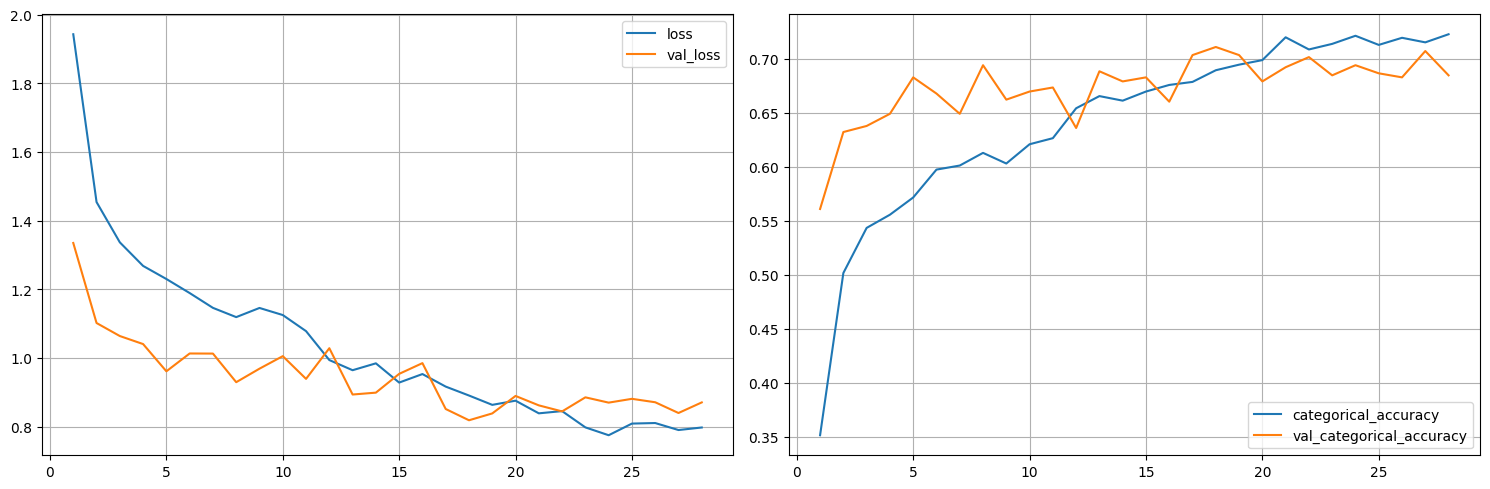

34/34 [==============================] - 19s 565ms/step - loss: 0.7972 - categorical_accuracy: 0.7229 - val_loss: 0.8703 - val_categorical_accuracy: 0.6848 - lr: 3.1250e-05


In [143]:
with tf.device('/GPU:0'):
    new_model.fit(new_train_generator,epochs=50,validation_data=new_val_generator,callbacks=callbacks_list)

Yeni model eğitilir.

Yeni modelde overfitting gözlemlenmiştir.

In [144]:
print("Evaluate on test data")
results_purplish_new = new_model.evaluate(test_generator_manipulated_purplish)
results_yellowish_new = new_model.evaluate(test_generator_manipulated_yellowish)
results_greenish_new = new_model.evaluate(test_generator_manipulated_greenish)
print("Test loss, test accuracy for purplish", results_purplish_new)
print("Test loss, test accuracy for yellowish", results_yellowish_new)
print("Test loss, test accuracy for greenish", results_greenish_new)


Evaluate on test data
21/21 [==============================] - 1s 69ms/step - loss: 0.8906 - categorical_accuracy: 0.7085
Test loss, test accuracy for purplish [0.8107209801673889, 0.7330769300460815]
Test loss, test accuracy for yellowish [0.8738164901733398, 0.7230769395828247]
Test loss, test accuracy for greenish [0.890618622303009, 0.7084615230560303]


In [145]:
new_model_row_purplish = {
    "Model": "Yeni Model",
    "Veri Seti": "Purplish Test Set",
    "Test Loss": results_purplish_new[0],
    "Test Accuracy": results_purplish_new[1],
}
new_model_row_yellowish = {
    "Model": "Yeni Model",
    "Veri Seti": "Yellowish Test Set",
    "Test Loss": results_yellowish_new[0],
    "Test Accuracy": results_yellowish_new[1],
}
new_model_row_greenish = {
    "Model": "Yeni Model",
    "Veri Seti": "Greenish Test Set",
    "Test Loss": results_greenish_new[0],
    "Test Accuracy": results_greenish_new[1],
}

# DataFrame'e yeni satırı ekle
results_df = pd.concat([results_df, pd.DataFrame([new_model_row_purplish])], ignore_index=True)
results_df = pd.concat([results_df, pd.DataFrame([new_model_row_yellowish])], ignore_index=True)
results_df = pd.concat([results_df, pd.DataFrame([new_model_row_greenish])], ignore_index=True)
results_df.head()

Model  ... Test Accuracy
0                     Manuel Olarak Ayarlanmış Model  ...      0.752308
1  Hiper Parametre Optimizasyonu ile Ayarlanmış m...  ...      0.730769
2                     Manuel Olarak Ayarlanmış Model  ...      0.246154
3                     Manuel Olarak Ayarlanmış Model  ...      0.326154
4                     Manuel Olarak Ayarlanmış Model  ...      0.110769

[5 rows x 4 columns]

In [146]:
print("Evaluate on test data")
results_purplish_wb_new = new_model.evaluate(test_generator_wb_purplish)
results_yellowish_wb_new = new_model.evaluate(test_generator_wb_yellowish)
results_greenish_wb_new = new_model.evaluate(test_generator_wb_greenish)
print("Test loss, test accuracy for purplish", results_purplish_wb_new)
print("Test loss, test accuracy for yellowish", results_yellowish_wb_new)
print("Test loss, test accuracy for greenish", results_greenish_wb_new)


Evaluate on test data
21/21 [==============================] - 3s 129ms/step - loss: 1.0679 - categorical_accuracy: 0.6577
Test loss, test accuracy for purplish [1.0676727294921875, 0.6553846001625061]
Test loss, test accuracy for yellowish [0.9920562505722046, 0.6776922941207886]
Test loss, test accuracy for greenish [1.0678761005401611, 0.6576923131942749]


In [147]:
new_model_row_purplish_wb = {
    "Model": "Yeni Model",
    "Veri Seti": "Purplish Test Set WB uygulanmış",
    "Test Loss": results_purplish_wb_new[0],
    "Test Accuracy": results_purplish_wb_new[1],
}
new_model_row_yellowish_wb = {
    "Model": "Yeni Model",
    "Veri Seti": "Yellowish Test Set WB uygulanmış",
    "Test Loss": results_yellowish_wb_new[0],
    "Test Accuracy": results_yellowish_wb_new[1],
}
new_model_row_greenish_wb = {
    "Model": "Yeni Model",
    "Veri Seti": "Greenish Test Set WB uygulanmış",
    "Test Loss": results_greenish_wb_new[0],
    "Test Accuracy": results_greenish_wb_new[1],
}

# DataFrame'e yeni satırı ekle
results_df = pd.concat([results_df, pd.DataFrame([new_model_row_purplish_wb])], ignore_index=True)
results_df = pd.concat([results_df, pd.DataFrame([new_model_row_yellowish_wb])], ignore_index=True)
results_df = pd.concat([results_df, pd.DataFrame([new_model_row_greenish_wb])], ignore_index=True)
results_df.head()

Model  ... Test Accuracy
0                     Manuel Olarak Ayarlanmış Model  ...      0.752308
1  Hiper Parametre Optimizasyonu ile Ayarlanmış m...  ...      0.730769
2                     Manuel Olarak Ayarlanmış Model  ...      0.246154
3                     Manuel Olarak Ayarlanmış Model  ...      0.326154
4                     Manuel Olarak Ayarlanmış Model  ...      0.110769

[5 rows x 4 columns]

Elde edilen sonuçlar önceki sonuçlarla kıyaslanmak üzere tabloya eklenir.

In [ ]:
results_df

Model  ... Test Accuracy
0                      Manuel Olarak Ayarlanmış Model  ...      0.752308
1   Hiper Parametre Optimizasyonu ile Ayarlanmış m...  ...      0.730769
2                      Manuel Olarak Ayarlanmış Model  ...      0.246154
3                      Manuel Olarak Ayarlanmış Model  ...      0.326154
4                      Manuel Olarak Ayarlanmış Model  ...      0.110769
5                      Manuel Olarak Ayarlanmış Model  ...      0.731538
6                      Manuel Olarak Ayarlanmış Model  ...      0.731538
7                      Manuel Olarak Ayarlanmış Model  ...      0.734615
8                                          Yeni Model  ...      0.733077
9                                          Yeni Model  ...      0.723077
10                                         Yeni Model  ...      0.708462
11                                         Yeni Model  ...      0.655385
12                                         Yeni Model  ...      0.677692
13                                         Yeni Model  ...      0.657692

[14 rows x 4 columns]

Sonuçlar yukarıdaki gibidir.

Elde edilen sonuçları incelediğimizde, **Manuel Olarak Ayarlanmış Model** ile **Yeni Model** arasında dikkat çeken farklar bulunmaktadır.

- **Orijinal Test Setinde**: Manuel ayarlanmış model, %75.23 doğruluk ile test edilirken, yeni modelin doğruluğu %72.31'e düşmüştür. Bu durum, manuel ayarlamanın bu test verisinde daha iyi performans gösterdiğini ortaya koymaktadır.
  
- **Manipüle Edilmiş Test Setlerinde**: Manipüle edilmiş verilere (Purplish, Yellowish, Greenish) uygulanmış testlerde ise sonuçlar daha belirgin bir şekilde değişmiştir. Manuel ayarlanmış model, manipüle edilmiş verilerde daha iyi performans sergilemiştir. Örneğin, **Purplish Test Seti** üzerinde manuel modelin doğruluğu %24.62 iken yeni modelin doğruluğu %73.31'e yükselmiştir. Bununla birlikte, **Yellowish Test Seti** ve **Greenish Test Seti** üzerinde de benzer şekilde yeni modelin doğruluğu artmış olsa da, manuel modelin performansı hala daha iyi gözükmektedir. Ancak, **Greenish Test Seti WB uygulanmış** veri setinde, manuel modelin doğruluğu %73.46 iken yeni modelin doğruluğu %65.77’ye gerilemiştir.

- **White Balance Uygulaması**: Her iki modelin de manipüle edilmiş veri setlerine white balance (WB) uygulandığında, manuel modelin performansı daha stabil kalmış, yeni modelin doğruluğu ise daha düşük seviyelerde kalmıştır. Örneğin, **Purplish Test Set WB** üzerinde manuel modelin doğruluğu %73.15 iken yeni model %65.54'te kalmıştır.

Genel olarak, **Manuel Olarak Ayarlanmış Model**, özellikle manipüle edilmiş veri setlerinde daha iyi performans göstermektedir. Bu durum, manuel ayarların modelin manipüle edilmiş verilere karşı daha sağlam bir yapı oluşturduğunu ve genellikle manipülasyonlardan kaynaklanan zorluklara karşı daha dirençli olduğunu düşündürmektedir. Ancak, yeni model de belirli test setlerinde, özellikle **Purplish** ve **Yellowish** üzerinde, önemli iyileştirmeler sağlamış ve farklı veri manipülasyonları ile denendiğinde daha esnek bir performans sergilemiştir.

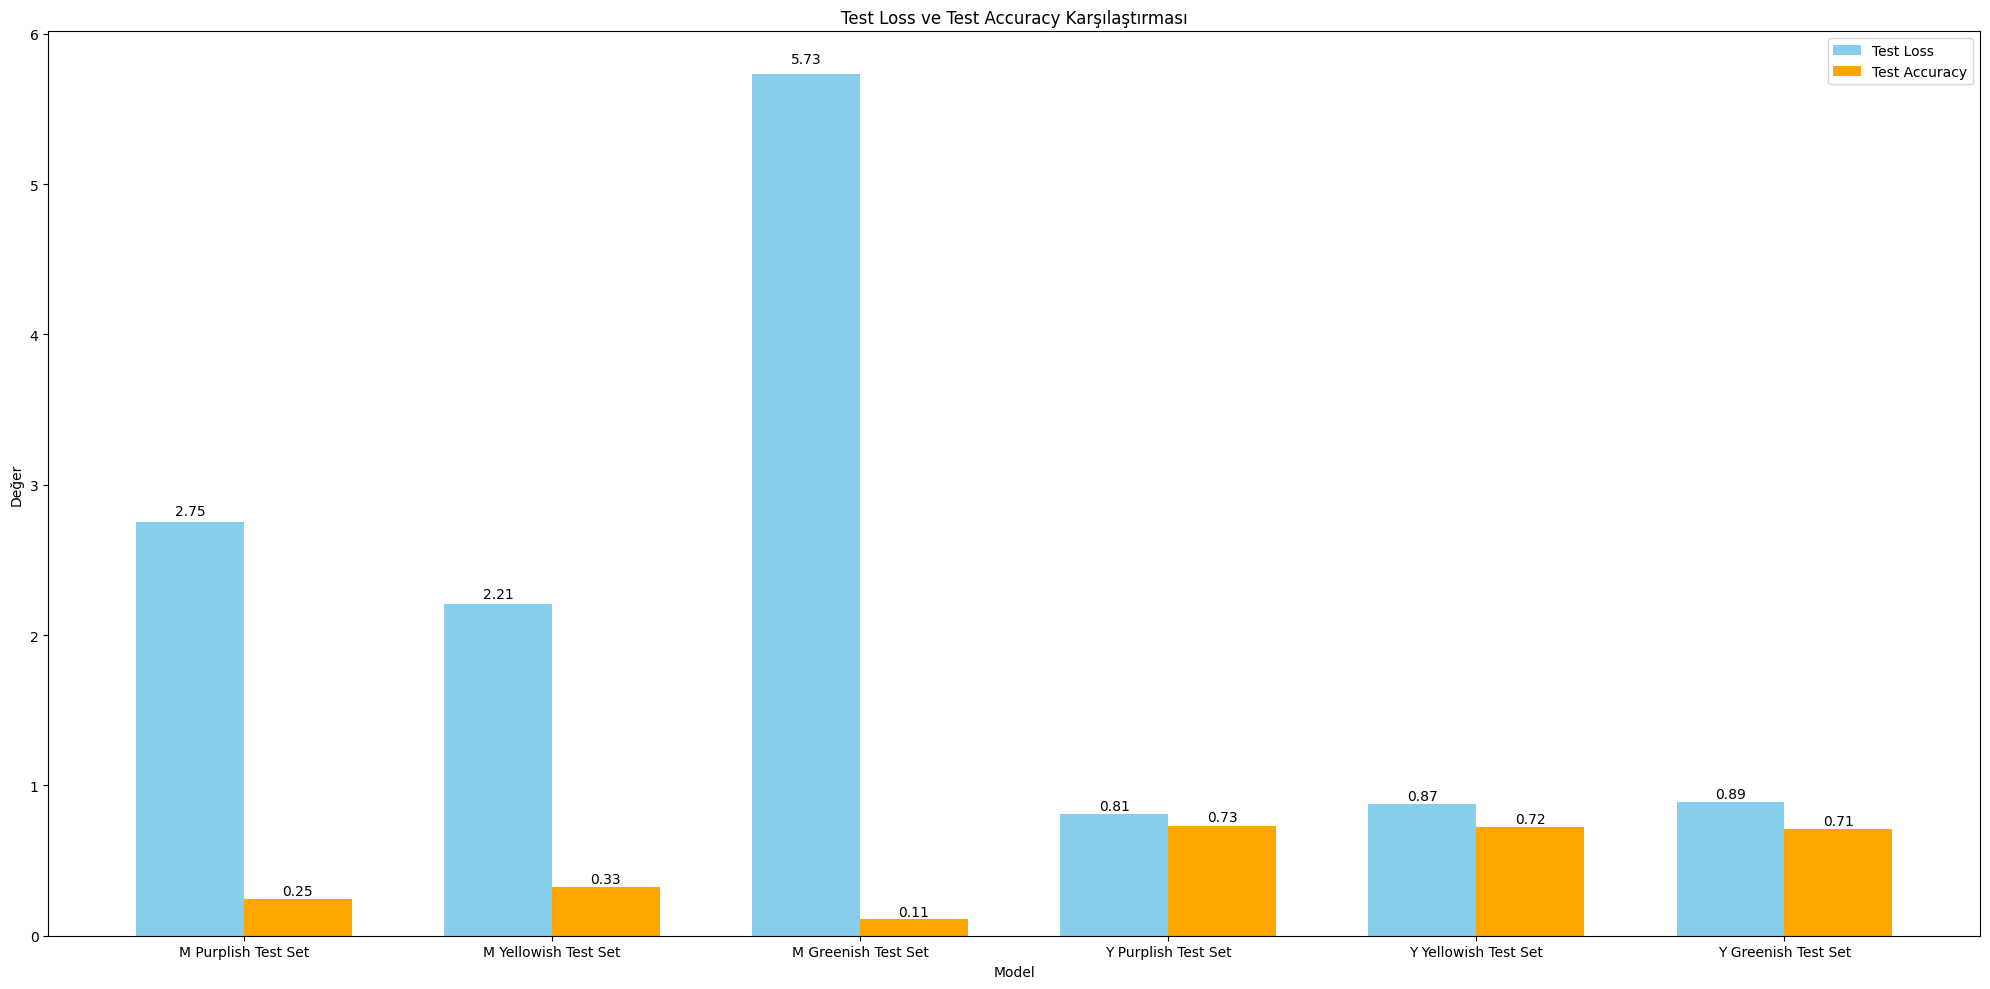

In [155]:
selected_ids = [2, 3,4,8,9,10]

# Seçilen modellere ait verileri filtreleme
filtered_df = results_df.iloc[selected_ids]

# Model sayısı kadar indeks
x = np.arange(len(filtered_df))

# Bar genişliği
width = 0.35

# Grafik oluşturma
fig, ax = plt.subplots(figsize=(20, 10))

# Test Loss ve Test Accuracy bar'ları
bar1 = ax.bar(x - width/2, filtered_df['Test Loss'], width, label='Test Loss', color='skyblue')
bar2 = ax.bar(x + width/2, filtered_df['Test Accuracy'], width, label='Test Accuracy', color='orange')

# Etiketler ekleme
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1.01*height, f'{height:.2f}', ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

# Grafik başlıkları ve etiketler
ax.set_xlabel('Model')
ax.set_ylabel('Değer')
ax.set_title('Test Loss ve Test Accuracy Karşılaştırması')
ax.set_xticks(x)
ax.set_xticklabels([label[:1] + " " + veri for label, veri in zip(filtered_df['Model'], filtered_df['Veri Seti'])])
ax.legend()

# Grafik düzenini sıkıştırma
plt.tight_layout()
plt.show()

Manipüle Edilmiş Test setlerinde sonuçlar yukarıdaki gibidir.

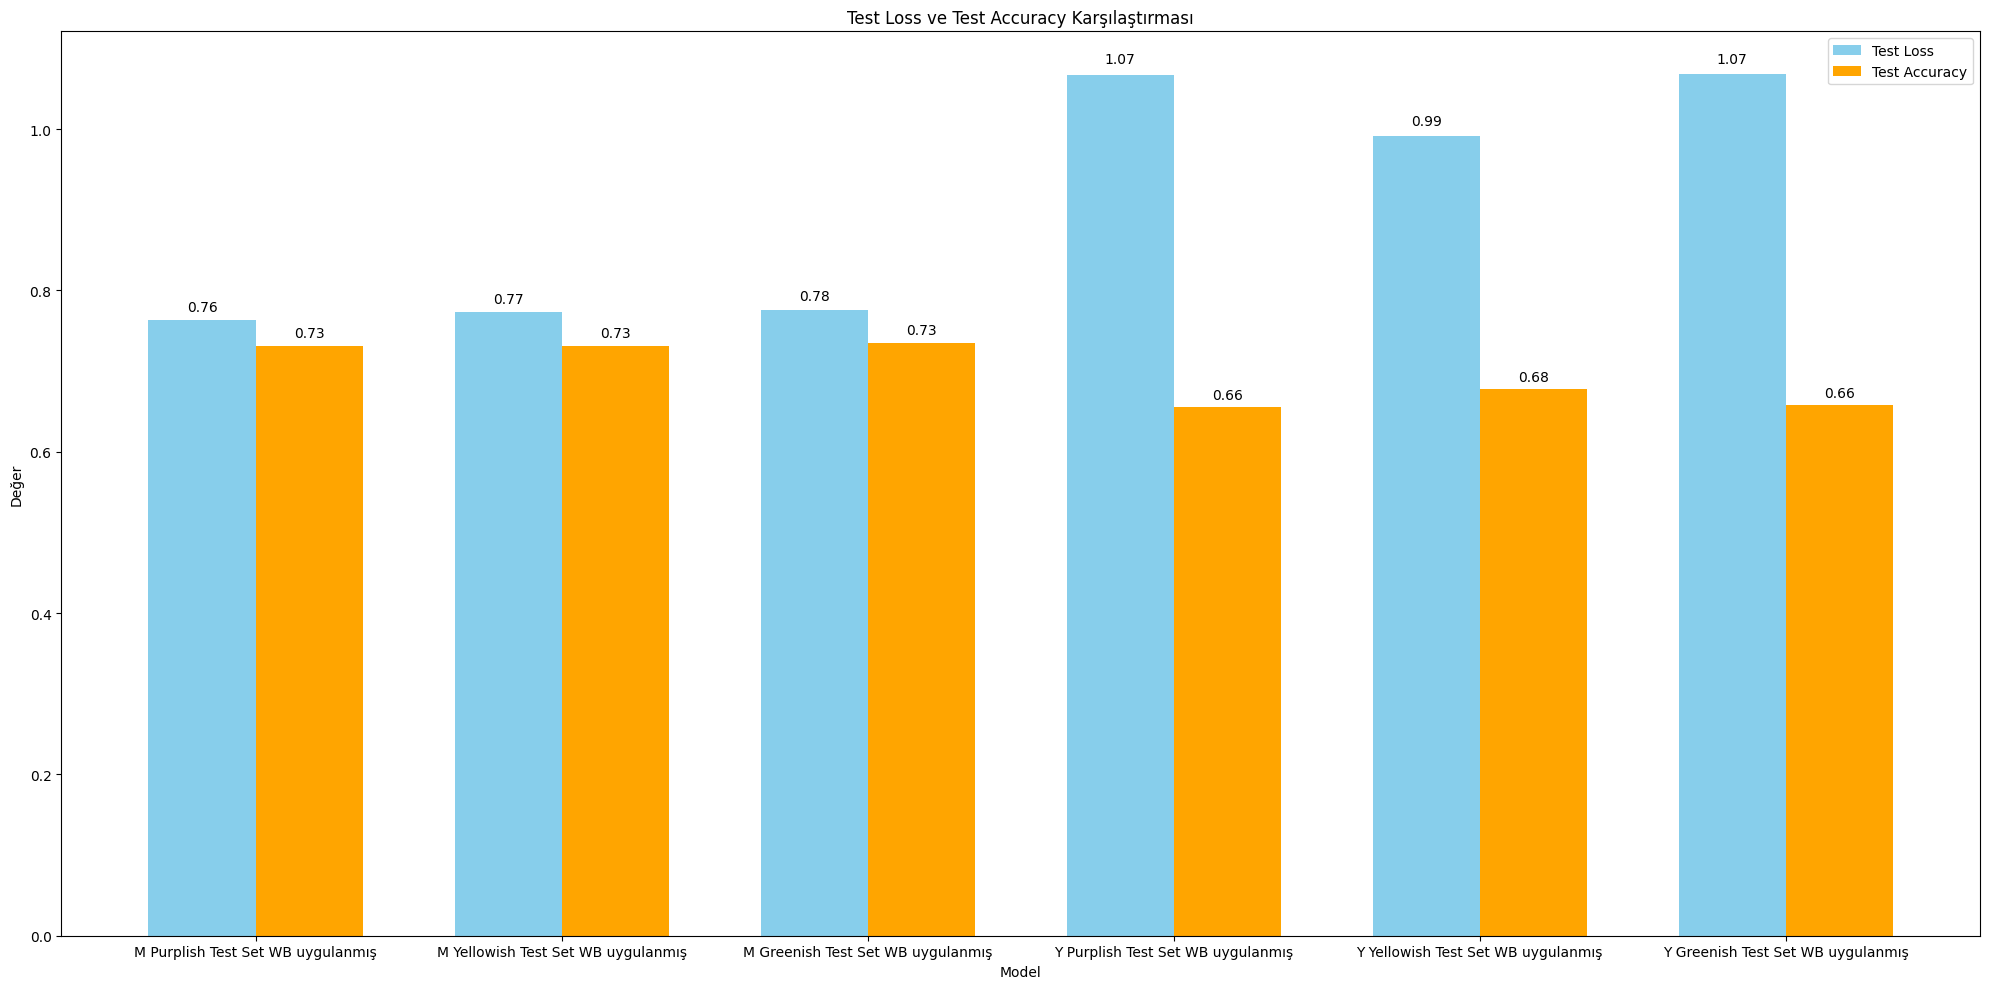

In [156]:
selected_ids = [5,6,7,11,12,13]

# Seçilen modellere ait verileri filtreleme
filtered_df = results_df.iloc[selected_ids]

# Model sayısı kadar indeks
x = np.arange(len(filtered_df))

# Bar genişliği
width = 0.35

# Grafik oluşturma
fig, ax = plt.subplots(figsize=(20, 10))

# Test Loss ve Test Accuracy bar'ları
bar1 = ax.bar(x - width/2, filtered_df['Test Loss'], width, label='Test Loss', color='skyblue')
bar2 = ax.bar(x + width/2, filtered_df['Test Accuracy'], width, label='Test Accuracy', color='orange')

# Etiketler ekleme
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1.01*height, f'{height:.2f}', ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

# Grafik başlıkları ve etiketler
ax.set_xlabel('Model')
ax.set_ylabel('Değer')
ax.set_title('Test Loss ve Test Accuracy Karşılaştırması')
ax.set_xticks(x)
ax.set_xticklabels([label[:1] + " " + veri for label, veri in zip(filtered_df['Model'], filtered_df['Veri Seti'])])
ax.legend()

# Grafik düzenini sıkıştırma
plt.tight_layout()
plt.show()

White Balance uygulanmış veri setlerinde sonuçlar yukarıdaki gibidir.

#### 7.4-Tartışma ve Sonuç

Proje sürecinde uygulanan veri hazırlama, model tasarımı, eğitim ve değerlendirme adımları sayesinde 10 farklı hayvan türünün sınıflandırılması başarılı bir şekilde gerçekleştirilmiştir. Model, eğitim ve test setlerinde yeterli doğruluk oranlarına ulaşmıştır. Bununla birlikte, gerçek hayatta karşılaşılabilecek veri çeşitliliğini ve ışık koşullarını simüle eden manipülasyon testleriyle modelin genelleme yeteneği test edilmiş ve sonuçlar detaylı bir şekilde analiz edilmiştir.

Elde edilen bulgular, uygulanan veri artırma, renk sabitliği ve hiperparametre optimizasyonunun sınıflandırma performansı üzerinde önemli bir etki yarattığını göstermektedir. Bununla birlikte, modelin bazı sınıflar arasında düşük ayrım performansı gösterdiği gözlemlenmiştir; bu durum, sınıflar arasındaki benzerliklerden kaynaklanabilir. 

Gelecekte, modelin performansını daha da iyileştirmek için aşağıdaki geliştirme önerileri sunulabilir:  
- Daha geniş bir veri setinin kullanımı, sınıflandırma doğruluğunu artırabilir.  
- Özellikle benzer sınıflar için daha karmaşık modellerin (örneğin, transfer öğrenme) uygulanması, ayırt edicilik gücünü artırabilir.  
- Gerçek dünya senaryolarını daha iyi temsil eden manipülasyonlar ve gürültü testleriyle model dayanıklılığı üzerinde çalışmalar yapılabilir.  
- Daha gelişmiş renk sabitliği algoritmaları veya diğer ön işleme teknikleriyle modelin farklı ışık koşullarına adaptasyonu geliştirilebilir.